# Data Science: Infering and Modeling


<hr/>

## Section 1

## Parameters and Estimates

We need to understand the connection between pools and the probability theory. Let's construct a scenario that we can work, and that is similar to the one that pollsters face.

We will use an urn instead of voters. And because pollsters are competing with other pollsters for media attention, we will imitate that by having our competition with a $25 price.

The challenge is to guess the spread between the proportion of *blue and red balls* in the urn.

<center><img src="images/urn.png" width=100 height=100/></center>

Before making  a prediction, we can take a sample, with replacement, from the urn. To mimic the fact that running pools is expensive, it will cost us $0.10 per bead you sample. So if we sample size is 250 and you win, we'll break even, as we'll have to pay me $25 to collect your $25.

Our entry into the competition can be an interval. If the interval we submit contains the true proportion, we get half what you paid and pass to second phase of the competition.

The second phase of the competition, the entry with the smallest interval is selected as the winner.

The ***dslabs*** package includes a function that shows a random draw from the urn. The code that we can write to see a sample is:

In [1]:
my_packages <- c( "dslabs", "tidyverse" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library( tidyverse )
library( dslabs )

ds_theme_set()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



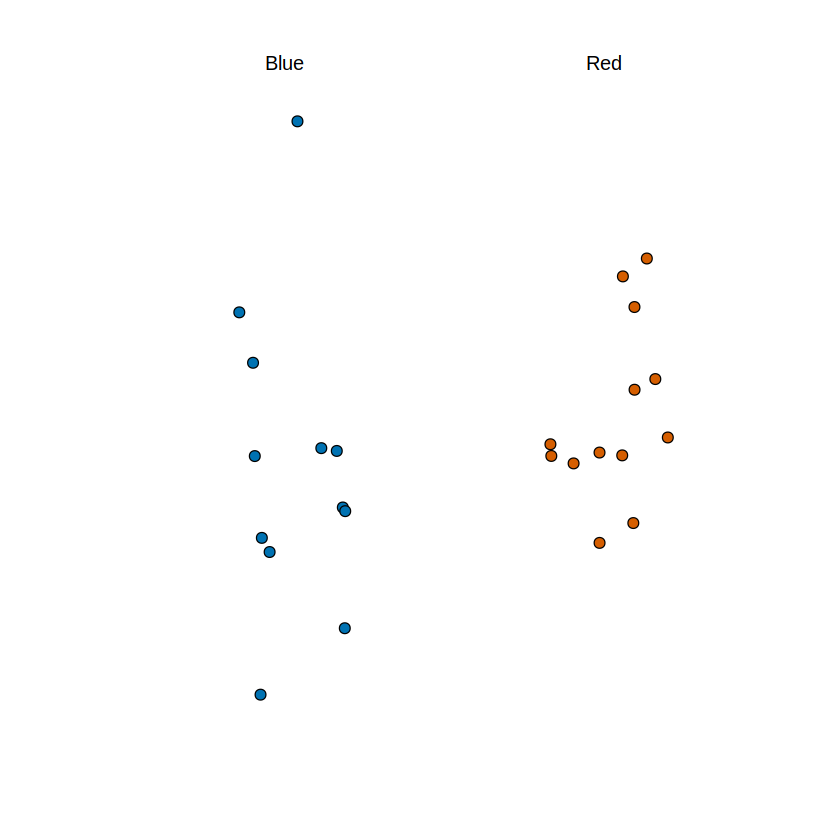

In [5]:
take_poll( 25 )

Now that we know the rules, think about how we would construct our interval. Notice that we have just described a *simple sampling model for opinion polls*. The beads inside urn represent the individuals that will vote on election day. Those that will vote **Republican** are represented with **read beans**, and **Democrats** with **blue beads**, we assume there are no other colors, that there are just two parties.

We want to predict the proportion of blue beads in the urn. Let's call this quantity \quantity, which in turn tell us the proportion of red beads, $1-p$, and the spread, $p - (1-p)$, which simplfies $2p - 1$.

Concepts:

* In statistical textbooks, the beads in the urn are called **the population**. 
* The proportion of blue beads in teh population, p, is called **parameter**. 
* The 25 beads that we saw in an earlier plot that's called a **sample**.
* The task of **statistical inference** is to *predict the parameter*, p, using the observed in the *sample*

Now we can do this with just the 25 observations we showed you?. For example, given that we see 14 red and 11 blue, it is unlikely that *p* is bigger than 0.9 or smaller than 0.1. The proportion red and blue. The proportion of reds and blues will be different every time we run the above code, the *take_poll* function.

But are we ready to predict with certainly that there are more red beads than blue?. Ok, what we want to do is contruct and *estimate of p* using only the information we observe. An *estimate* can be thought of as a *summary of the observed data that we think is informative about the parameter of interes*. In this case, the proportion of blue beads is $12/25 = 0.48$, but as the sample proportion is a *random variable*, if we run the *take_poll(25)* n-times, we will get different answers.

This set of results describing the **distribution of this random variable**,  we'' be able to gain insights into how good this estimate is and how we can make it better.


#### Key points

* the task of statistical inference is to estimate an unknown population parameter using observed data from a *sample*.
* In a sampling model, the collection of elements in the urn is called *population*.
* A *parameter* is a number that summarizes data for an entire population.
* A *sample* is observed data from a subset of the population.
* An *estimate* is a summary of the observed data about a parameter that we believe is informative.
* We want to predit the proportion of the blue beads in the urn, the parameter *p*. The proportion of red beans in the urn is $1 - p$ and the *spread* is $2p - 1$.
* The *sample proportion* is a **random variable**. Sampling gives random results drawn from the population distribution.

### The sample average

Once we have this estimate (previous example), we can easily report an estimate of the spread. But for simplicity, we will illustrate the concept of *statistical inference* for estimating *p*. 

We will use our knowledge of probability to defend our use of the *sample proportion*, and quanitfy how close we think it is from the population proportion *p*. We start by defining the randmo variable *X*, it's going to be 1 if we pick a blue bead at random, and 0 it's red. This implies that we're assuming that the population, the beads in the urn, are a list of 0s and 1s.

If we sample *N-beads*, then the *average* of the draws $X_1$ through $X_N$ is equivalent to the proportion of blue beads in our sample. The average is denoted by

$$\overline{X} = \frac{X_1 + X_2 + \ldots + X_N}{N}$$

In general, the statistics textbooks, a bar on top of a symbol means the **average**.

The theory we just learned about the sum of draws becomes useful, because we know the distribution of the sum *N-times X-bar*

$$N\overline{X} = \frac{N(X_1 + X_2 + \ldots + X_N)}{N} = (X_1 + X_2 + \ldots + X_N)$$



For simplicity, let's assume that the draws are independent. After we see each smaple bead, we return it to the urn, it's a sample with replacement. In this case, what do we know about the distribution of the sum of draws?

We know that the expecte value of the sum of draws is $N\overline{X}$ of the values in the urn. We know that the average of the 0s and 1s in the urn must be the proportion *p*, the value we want to estimate. Here we don't know what is in the urn, we know there are blue and red beads, but we don't know how many of each, this is what we're trying to find out.

Just like we use variable to define unknowns in systems of equations. In statistical inference, we define parameteres to define unknown parts of our models. In the urn model we are using to mimic an opinion poll, we do not know the proportion of blue beads in the urn, we define the parameter *p* to represent this quantity.

Note that the ideas presented here, on how we estimate parameters and provide insights into how good these estimates are, extrapolate to many data science tasks.

#### Key points

* Many common data science tasks can be framed as estimating a parameter from a sample.
* We illustrate statistical inference by walking through the process to estimate *p*. We can easily calculate an estimate of the spread, *2p - 1*.
* Consider ramdon variable *X* that is 1 if blue bead is chosen and 0 if a red bead is chosen. The proportion of blue beads in *N-draws* is the **average of the draws** $X_1, X_2, \ldots , X_N$.
* $\overline{X}$ is the *sample average*. In statistics, a bar on top of a symbol denotes the average. $\overline{X}$
  $$\overline{X} = \frac{X_1 + X_2 + \ldots + X_N}{N}$$
* The number of blue beads drawn in *N-draws*, $N\overline{X}$, is *N* times the proportion of values in the urn. However, we do not known the true proportion: we are trying to estimate this parameter *p*

### Polling versus forecasting  (*sondeo versus pronóstico*)

Let's make an important clarification related to the practical problem of forecasting the election (pronóstico de elección). If a poll is conducted 4 months before the elecction, it is estimation the *p* for that moment, not for election day. But, note that the *p* for election night might be different since people's opinions fluctuate through time.

The polls provided the night before the election tend to be the mos accurate since opinions don't change that much in a couple of days.

However, **forecasters** try to build tools that model how opinions vary across time and try to predict the election day result, takeing into consideration the fact that opinions fluctuate.

### Properties of our estimate


To understand how good our estimate is, we'll describe the *statistical properties of the random variable* we just defined, ***the sample proportion***.

Using what we have learned, the expected value of the sum *N times $\overline{X}$* is *N times the average of the urn, p*.

$$
\begin{array}{l}
    \overline{X} = \frac{X_1 + X_2 + \ldots + X_N}{N} \\
    \\
    N\overline{X} = \frac{N(X_1 + X_2 + \ldots + X_N)}{N} = X_1 + X_2 + \ldots + X_N \\
    \\
    E(N\overline{X}) = N \ast p \implies \frac{E(N\overline{X})}{N} = E(\overline{X}) = p
\end{array}
$$

So dividing by the *non-ramdom constant N* give us that the expected value of the average $\overline{X}$ is *p*.

We also can use what we know about ***standard error***. We know that the *standard error* of the sum is *square root of N times a standard deviation of the values of the urn*.

We learn a formula that tells us that it's:

$$ (1 - 0) \sqrt{p(1 - p)} $$

Because we are dividing by the *sum N*, we arrive at the following formula for the *standard error of the average*:

$$ SE(\overline{X}) = \sqrt{\frac{p(1 - p)}{N} } $$

This result reveals the power of polls. We can make the *standard error* as samll as we want by increasing the sample size *N*. The ***law of large numbers*** tells us that with a large enough poll, our estimate converges to *p*. If we take a large enough poll to make our standard error about 0.01, we'll be quite certain about who will win.



But, how large does the poll have to be for standard error to be this small?. One problem is that we do not know *p*, so we can't actually compute the standard error. Let's assume that *p = 0.51* and make a plot of the standard error versus *sample size N*, here is the graph:

<center><img src="images/standard_error.png" with="350" height="350" /></center>

We can see that it's dropping, we see that would need a poll of over 10,000 people to get the standard error as low as we want it to be. Polls if this size are very expensive and it is rare that they do, between other reasons.

For a *sample size of 1,000*, if we set *p = 0.51*, the standard error is about *0.15*, or *1.5%* points. So even with large polls for close elections, $\overline{X}$ can lead us astray if we don't realize it's a random variable.

#### Key points

* When interpreting values of $\overline{X}$, it is important to remember that $\overline{X}$ is random variable with an expected value and standard error that representes the sample proportion of positive events.
* The expected value of $\overline{X}$ is the parameter of *interest p*: $E(\overline{X}) = p$.
* As the number of draws *N* increases, the standard error of our estimate $\overline{X}$ decreases. The standard error (SE) of the average of $\overline{X}$ over *N* is $SE(\overline{X}) = \sqrt{p(1-p)/N}$
  * In theory, we can get more accurate estimates of *p* by increasing *N*. In practice, there are limits on the size of *N* due to costs.
  * We can also use other random variables equations to determine the expected value of the sum of draws *E(S)* and standard error of the sum of draws *SE(S)*:
    $$
    \begin{array}{l}
        E(S) = Np \\ 
        SE(S) = \sqrt{Np(1-p)}
    \end{array}
    $$

Exercise 1. Polling - expected value of S

We suppose you poll a population in which a proportion *p* of voters are Democrats and *1-p* are Republicans. You sample size is *N=25*. Consider the random variable *S*, which is the **total number of Democrats** in your sample. What is the expected value of this random variable *S*?.

<center>E(S) = Np = 25p</center>

Exercise 2. Polling - standard error of S

Again, consider the random variable *S*, which is the **total number of Democrats** in your sample of 25 voters. The variable *p* describes the proportion of Democrats, whereareas *1-p* describes the proportion of Republicans. What is the standard error of S?.

$$SE(S) = \sqrt{Np(1-p)} = \sqrt{25p(1-p)}$$


Exercise 3. Polling - expected value of $\overline{X}$.

Consider the random variable *S/N*, which is equivalent to the sample average that we have been denoting as $\overline{X}$. The variable *N* represents the size and *p* is the proportion of Democrats in the population. What is the expected value of $\overline{X}$?.
$$ E(\overline{X}) = p$$


Exercise 4. Polling - standard error of $\overline{X}$

What is the standar error of the sample average, $\overline{X}$?.

The variable *N* represents the sample size and *p* is the proportion of Democrats in the population.

$$  SE(\overline{X}) = \sqrt{p(1-p)/N} $$

Exercise 5. *SE* versus *p*

Write a line of code that calculate the standard error (*SE* or *se*) of a sample average when you poll 25 people in the population. Generate a sequence of 100 proportions of Democrats *p* that vary from 0 (no Democrats) to 1 (all Democrats).

Plot *se* versus *p* for the 100 different proportions.

Instructions:

* Use the *seq* function of R to generate a vector of 100 values of *p*, that range from 0 to 1.
* Use the *sqrt* function to generate a vector of standard errors for all values of *p*.
* Use the *plot* function to generate a plot with *p* on the x-axis and *se* on the y-axis.

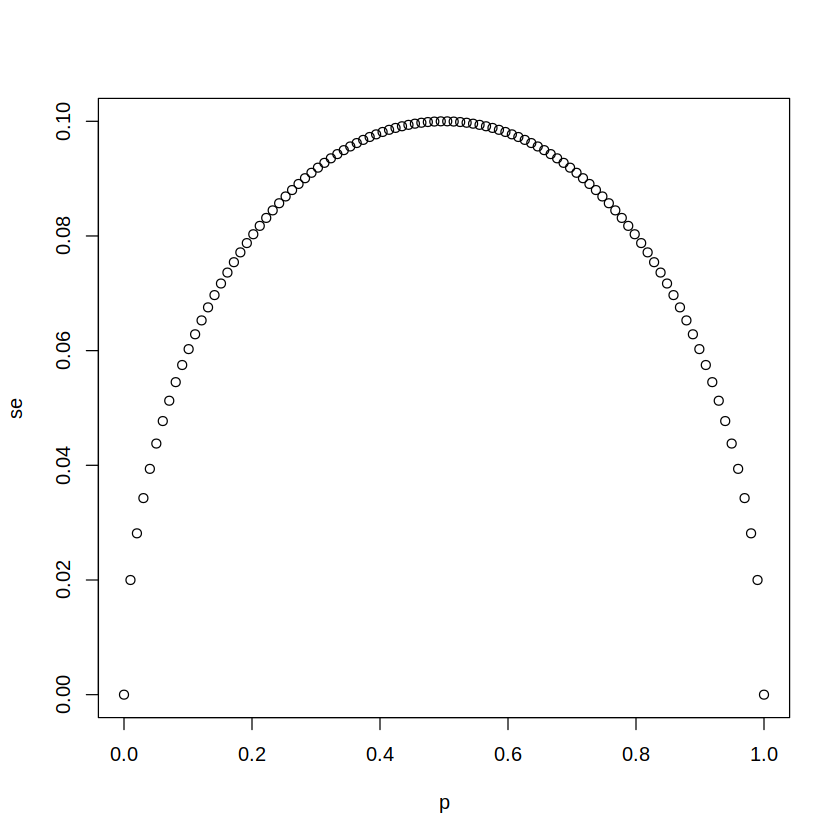

In [2]:
N <- 25                                             # number of people polled
p <- seq( from=0, to=1, length.out=100 )            # sequence of 100 proportions in range 0 to 1.
se <- sqrt(p*(1-p)/N)                                # create se for each sample average.

plot( p, se )

Exercise 6. Multiple plots of *se* versus *p*.

Using the same code as an the previous exercise, create a *for-loop* that generates three plots of *p* versus *se* when the sample sizes equal *N=25*, *N=100*, and *N=1000*.

Instruction:

* the *for-loop* should contain two lines of code to be repeated for three different values of *N*.
  * the first line within the *for-loop* should use the *sqrt* function to generate a vector of standard errors, *se*, for all values of *p*.
  * the second line within the *for-loop* should use the *plot* function to generate a plot with *p* on x-axis and *se* on the y-axis.
* Use the *ylim* argument to keep y-axis limits constant across all three plots. The lower limit should be equalt to 0, and the upper limit should equal 0.1.

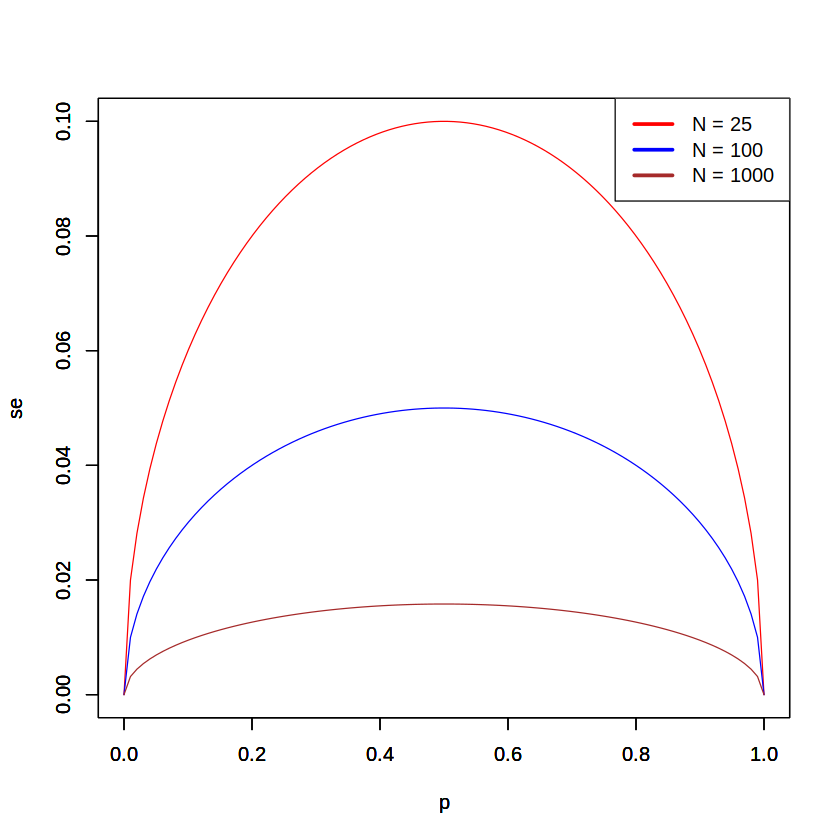

In [19]:
p<- seq( 0, 1, length=100 )
sample_sizes <- c( 25,100,1000 )                            # vector contains the three sample sizes.

nord <- 0
for ( x in sample_sizes ) {
    se <- sqrt( p*(1-p)/x ) 
    if (nord == 0) {
        color = 'red'
        nord <- nord + 1
    } 
    else if (nord == 1) {
        color = 'blue'
        nord <- nord + 1
        par( new=TRUE )
    } else {
        color = 'brown'
        nord <- nord + 1
        par( new=TRUE )
    }
    plot( p, se, type="l", col=color, ylim=c(0,0.1) )
}
legend("topright", legend=c("N = 25","N = 100","N = 1000"), lwd=3, col=c("red","blue","brown") )

Exercise 7. Expected value of *d*.

Our estimate for the difference in proportions of Democrats and Republicans is $d = \overline{X} - (1 - \overline{X})$. Which derivation correctly uses the rules we learned about sums of random variables and scaled random variables to derive the expected value of *d*?

$$
\begin{array}{l}
    d = \overline{X} - (1 - \overline{X}) \equiv E[\overline{X} - (1 - \overline{X})] = 2E[\overline{X} - 1] = 2E[\overline{X}] - 1\\
    \\
    E(\overline{X}) = p \\
    \\
    2E[\overline{X}] - 1 = 2p - 1 = p - (1 - p) = d
\end{array}
$$

Exercise 8. Standard error of *d*.

Our estimate for the difference in proportions of Democrats and Republicans is $d = \overline{X} - (1 - \overline{X})$. Which derivation correctly uses the rules we learned about sums of random variables and scaled random variables to derive the standard error of *d*?.


$$
\begin{array}{l}
    d \equiv SE[\overline{X} - (1 - \overline{X})] = 2SE[\overline{X}] - 1\\
    \\
    SE(\overline{X}) = \sqrt{p - (1-p)/N} \\
    \\
    2SE[\overline{X}] - 1 = 2\sqrt{p-(1-p)/N} - 1 = d
\end{array}
$$

But, substract 1 does not affect the standard error, the answer correct is $d=2\sqrt{p-(1-p)/N}$

Exercise 9. Standard error of the spread

Say the actual proportion of Democratic voters is *p=0.45*. In this case, the Republican party is winning by a relatively large margin of *d=-0.1*, or a *10\%* margin of victory. What is the standard eror of the spread $2\overline{X} - 1$ in this case?.

Instructions:

* use the *sqrt* function to calculate the standard error of the spread $2\overline{X} - 1$.

In [21]:
N <- 25                                 # number of people polled
p <- 0.45                               # proportion of Democratic voters

se <- 2*sqrt( (p*(1-p))/N )

print( se )

[1] 0.1989975


Exercise 10. Sample size.

So far we have said that the difference between the proportion of Democratic voters and Republican voters is about *10%* adn that the standard error of this spread is about *0.2* when *N=25*. Select the statement that explains why this sample size is sufficient or not.

1. This sample size is sufficient because the expected value of our estimate $2\overline{X} - 1$ is *d* so or prediction will be right on.
2. This sample size is too small because the standard error is larger than the spread.
3. This sample size is sufficient because standard error of about 0.2 is much smaller than the spread of 10%.
4. Without knowing *p*, we have no way of knowing that increasing or sample would actually improve our standard error.

Solution: answer 2.




<hr/>

## Section 2: The Central Limit Theorem (CLT) in Practice

The **Central Limit Theorem** tells us that the *distribution function for a sum of draws ($X_1+X_2+\ldots+X_N$) is approximately **normal***.

We also learned that *when dividing a normlly distributed random variable by a non-random constant, the resulting random variable is also normally distributed*.

$$
\begin{array}{l}
    X \sim N(\mu, \sigma) \\
    \\
    \frac{X}{a} \sim N\left(\frac{\mu}{a},\frac{\sigma}{a}\right)
\end{array}
$$

This implies that the *distribution of* $\overline{X}$ *is approximately **normal*** . In the previous section we determined that the *expected value is p* ($\overline{X}:p$), and the *standard error is the square root of p(1-p) divided by the sample size N*.

$$
\begin{array}{l}
    \overline{X} = p \\
    \\
    \overline{X} = \sqrt{\frac{p(1-p)}{N}}
\end{array}
$$

Now, how does this help us?.

Suppose we want to know what is the probability that we are within one percentage point from *p*?. Basically asking, what's teh probability that the distance between $\overline{X}$ and *p*, the absolute value of $\overline{X} - p$ is less than $0.01$:

$$Pr(|\overline{X} - p| \leq 0.01)$$

We can use what we've learned to see that this is the same as asking, what is the probability of $\overline{X}$ being less than or equal to *p* + *0.01 minus the probability of* $\overline{X}$ *being less than or equal to p - 0.01*.

<center><img src="images/sec02_01.png" width="50%" height="50%" /></center>

Can we compute that probability?. We can use the mathematical trick that we learned in the previous section. WE subtract the expected value and divide by the standard error on both sides of the equation.

$$
\begin{array}{l}
Pr\left(\frac{\overline{X} - E(\overline{X})}{SE(\overline{X})} \leq \frac{(p+0.01)-E(\overline{X})}{SE(\overline{X})}\right) - Pr\left( \frac{\overline{X} - E(\overline{X})}{SE(\overline{X})} \leq -\frac{(p-0.01)-E(\overline{X})}{SE(\overline{X})} \right) \\
\\
\mathit{Z} = \frac{\overline{X} - E(\overline{X})}{SE(\overline{X})} \\
\\
Pr\left(\mathit{Z} \leq \frac{(p+0.01)-E(\overline{X})}{SE(\overline{X})}\right) - Pr\left( \mathit{Z} \leq -\frac{(p-0.01)-E(\overline{X})}{SE(\overline{X})} \right) \\
\\
\\
p = E(\overline{X}) \\
\\
SE(\overline{X}) = \sqrt{\frac{p(1-p)}{N}}\\
\\
Pr\left(\mathit{Z} \leq \frac{0.01}{\sqrt{\frac{p(1-p)}{N}}}\right) - Pr\left( \mathit{Z} \leq -\frac{0.01}{\sqrt{\frac{p(1-p)}{N}}} \right) \\
\end{array}
$$


Ok, now can we compute this probability?. No yet. Our problem is that we don't know *p*. So we can't actually compute the standard error of $\overline{X}$ using just the data. The CLT still works if we use an estimate of the standard error that, instead of *p*, uses $\overline{X}$ in its place, we call this a plug-in estimate (estimación complementaria). Our estimate of the standard error is therefore:

$$
\widehat{SE} = \sqrt{\frac{\overline{X}(1-\overline{X})}{N}}
$$

We can see a *hat on top of SE*, in statistics textbooks, we use a little hat like this to denote **estimates**. This is an estimate of the standard error, not the actual standard error.

Note that, importantly, that this estimate can actually be constructed using the observed data.

Now, let's continue our calculations. But now instead of dividing by the standard error, we're going to divide by this *estimate of the standard error*. Let's compute this estimate of the standard error for the first example that we took, in which we had:

* 12 blue beads
* 13 red beads
* The $\overline{X} = 12/25 = 0.48$.

So to compute the standard error (SE), we simply write this code

In [8]:
X_hat <- 0.48 
se <- sqrt( X_hat * (1 - X_hat) / 25 )
se

[1] 0.09991997

And we get that it's $0.0999199\ldots \approx 0.1$. So now, we can answer the question. We can compute the probability of being as close to *p* as we wanted. We wanted to be 1 percentaje point away. The answer is simply:

In [10]:
pnorm( 0.01/se ) - pnorm( -0.01/se)

[1] 0.07971926

The answer is that the probability of this happening is about 8\%. So there is a **very small chance** that we'll be as close as this to the actual proportion.

It wasn't very useful, but what it's going to do, what we're going to be able to do with the CLT is determine what sample sizes are better. We'll be able to provide a very good estimate and some very informative probabilities.



### Margin of error


So a poll of only 25 people is not really very useful, at least for a close election. Earlier we mentioned the ***margin of error***, which we can now estimate. We can define it because it is simply $2\ast SE$. In our cas it was 2 times *SE*, which is about *0.2*.

In [11]:
2*se

[1] 0.1998399

Why do we multiply by 2?. This is because if you ask what is the probability that we're within 2 stanard errors from *p*, using the same previous equations, we en up with an equation like this one.

$$Pr( |\overline{X}) - p| \leq 2SE(\overline{X}) )$$

$$Pr( \overline{X} \leq p + 2SE(\overline{X}) ) - Pr( \overline{X} \leq - 2SE(\overline{X}) ) $$

This one simplifies out, and we're simply asking what is the probabilitiy of the standar normal distribution that has the expected value 0 and standard error one is within two values from 0, and we know that this is about 95\%.

$$
\begin{array}{l}
Pr( \overline{X} \leq p + 2SE(\overline{X}) ) - Pr( \overline{X} \leq - 2SE(\overline{X}) ) \\
\\
Pr( \mathit{Z} \leq 2SE(\overline{X}/SE(\overline{X})) ) - Pr( \mathit{Z} \leq - 2SE(\overline{X}/SE(\overline{X}))\\
\\
Pr( \mathit{Z} \leq 2 ) - Pr( \mathit{Z} \leq -2 ) 
\end{array}
$$


In [12]:
pnorm(2) - pnorm(-2)

[1] 0.9544997

So there's a $95\%$ chance that $\overline{X}$ will be within 2 standard errors. That's the *margin of error*, in our case, to *p*.

Now why do we use 95\%?, It's somewhat arbitrary, traditionally, that's been used.

In summary, the *Central Limit Theorem* tells us that *our poll based on a sample of just 25 is not very useful*. We don't really learn much when the margin of error is this large. All we can really say is that the popular vote wil not be won by a large margin. This is why pollsters tend to use larger sample sizes.


From the table that we see down, from *RealClearPolitics*, we see that a typical sample size was between 700 and 3,500.

<center><img src="images/general_election.png" width="75%" height="75%" /></center>

To see how this gives us a much more practical result, note that if we had obtained an $\overline{X}$ of $0.48$, but with a sample size of $2,000$, the estimated standard error would have been about $0.01$. So our result is an estimate of $48\%$ blue beads with a margin of error of $2\%$. In this case, the result is much more informative and would make us think that there are more red beads than the blue beads.



### Monte Carlo Simulation for the *CTL*



To create a simulation, we would need to write code like this

In [4]:
B <- 10000 
N <- 1000

X_hat <- replicate( B, {
    X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p, p))
    mean(X)
})

The problem is that we can't run the code we just showed you because we don't know what *p* is. However, we could construct an urn like the one we showed in a previous section and actually run an analog simultaion. It would take a long time because you would be picking beads and counting them, but we could take *10,000* samples, count the beads each time, and keep track of the proportions that you see.

We can use the function *take_poll* with *N=1,000*, but it would still take time because we would to count the beads and enter the results into *R*.

One thing we can do is to pick a value of *p* or several values of *p* and then run a simulations using those. An example, let's set *p = 0.45*, we can simulate one poll of *1,000* beads or people using this simple code:


In [5]:
p <- 0.45 
N <- 1000
X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p,p) )
X_hat <- mean(X)
X_hat

[1] 0.457

Now we can take that into a *Monte Carlos Simulation*. Do it *10,000* times, each time returning the proportion of blue beads that we get in our sample.

In [10]:
B <- 10000

X_hat <- replicate( B, {
    X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p,p) )
    mean( X )
})
X_hat

[1] 0.439 0.436 0.469 0.470 0.453 0.460 0.478 0.454 0.486 0.460 0.440 0.481
   [13] 0.456 0.452 0.443 0.439 0.438 0.472 0.444 0.456 0.437 0.478 0.465 0.459
   [25] 0.437 0.454 0.434 0.462 0.435 0.440 0.481 0.440 0.441 0.449 0.452 0.428
   [37] 0.456 0.444 0.451 0.470 0.437 0.462 0.441 0.454 0.463 0.456 0.475 0.428
   [49] 0.468 0.461 0.453 0.430 0.426 0.437 0.447 0.439 0.449 0.437 0.437 0.450
   [61] 0.454 0.455 0.450 0.406 0.455 0.455 0.460 0.452 0.441 0.437 0.458 0.456
   [73] 0.460 0.441 0.438 0.476 0.473 0.482 0.431 0.432 0.454 0.461 0.473 0.439
   [85] 0.439 0.435 0.478 0.436 0.457 0.480 0.448 0.459 0.446 0.439 0.442 0.454
   [97] 0.459 0.464 0.464 0.451 0.454 0.458 0.428 0.484 0.451 0.434 0.462 0.453
  [109] 0.411 0.452 0.457 0.463 0.437 0.451 0.434 0.467 0.446 0.463 0.426 0.446
  [121] 0.459 0.451 0.461 0.441 0.468 0.455 0.425 0.443 0.422 0.435 0.458 0.451
  [133] 0.428 0.471 0.433 0.440 0.464 0.460 0.468 0.463 0.458 0.421 0.461 0.433
  [145] 0.466 0.451 0.477 0.452 0.459 0.482 0.465 0.452 0.463 0.473 0.413 0.447
  [157] 0.478 0.446 0.460 0.450 0.450 0.450 0.461 0.464 0.416 0.470 0.472 0.454
  [169] 0.439 0.432 0.461 0.471 0.446 0.448 0.472 0.477 0.445 0.443 0.446 0.441
  [181] 0.449 0.465 0.474 0.450 0.428 0.440 0.434 0.470 0.453 0.459 0.453 0.447
  [193] 0.448 0.457 0.435 0.474 0.464 0.434 0.458 0.447 0.455 0.444 0.445 0.457
  [205] 0.457 0.431 0.463 0.447 0.461 0.467 0.449 0.453 0.454 0.450 0.434 0.431
  [217] 0.477 0.456 0.459 0.464 0.469 0.436 0.468 0.467 0.471 0.449 0.445 0.475
  [229] 0.443 0.440 0.441 0.436 0.452 0.427 0.441 0.456 0.461 0.462 0.421 0.428
  [241] 0.453 0.438 0.455 0.462 0.433 0.442 0.448 0.464 0.482 0.468 0.449 0.451
  [253] 0.467 0.413 0.457 0.454 0.451 0.444 0.452 0.451 0.454 0.426 0.493 0.447
  [265] 0.446 0.447 0.450 0.443 0.463 0.450 0.462 0.461 0.450 0.447 0.437 0.426
  [277] 0.448 0.444 0.456 0.424 0.450 0.449 0.445 0.433 0.465 0.443 0.456 0.458
  [289] 0.461 0.437 0.455 0.444 0.463 0.449 0.442 0.476 0.471 0.458 0.444 0.464
  [301] 0.464 0.446 0.440 0.444 0.446 0.463 0.473 0.458 0.455 0.434 0.431 0.451
  [313] 0.451 0.454 0.454 0.449 0.416 0.440 0.444 0.465 0.472 0.459 0.463 0.439
  [325] 0.432 0.447 0.432 0.438 0.452 0.451 0.456 0.443 0.439 0.457 0.457 0.470
  [337] 0.469 0.463 0.442 0.461 0.447 0.431 0.409 0.424 0.440 0.449 0.442 0.465
  [349] 0.468 0.458 0.439 0.464 0.438 0.449 0.446 0.482 0.444 0.429 0.454 0.460
  [361] 0.467 0.450 0.445 0.446 0.448 0.475 0.428 0.448 0.446 0.455 0.476 0.460
  [373] 0.445 0.429 0.451 0.431 0.442 0.433 0.454 0.460 0.474 0.441 0.437 0.451
  [385] 0.434 0.422 0.454 0.484 0.468 0.473 0.438 0.460 0.420 0.464 0.463 0.470
  [397] 0.437 0.441 0.435 0.454 0.459 0.451 0.469 0.461 0.459 0.438 0.426 0.458
  [409] 0.460 0.456 0.446 0.424 0.443 0.436 0.432 0.428 0.460 0.413 0.459 0.457
  [421] 0.447 0.448 0.445 0.475 0.445 0.459 0.455 0.468 0.434 0.462 0.453 0.446
  [433] 0.443 0.430 0.440 0.449 0.448 0.448 0.432 0.432 0.455 0.453 0.434 0.470
  [445] 0.425 0.461 0.456 0.476 0.463 0.451 0.461 0.448 0.443 0.431 0.480 0.434
  [457] 0.456 0.440 0.417 0.458 0.458 0.469 0.451 0.457 0.450 0.444 0.441 0.460
  [469] 0.451 0.434 0.439 0.453 0.453 0.429 0.437 0.442 0.452 0.443 0.441 0.430
  [481] 0.431 0.465 0.477 0.408 0.475 0.475 0.463 0.450 0.431 0.445 0.467 0.450
  [493] 0.448 0.455 0.420 0.448 0.446 0.433 0.477 0.473 0.444 0.467 0.460 0.447
  [505] 0.453 0.450 0.476 0.456 0.442 0.440 0.446 0.444 0.459 0.476 0.439 0.435
  [517] 0.482 0.460 0.458 0.442 0.448 0.467 0.465 0.443 0.483 0.457 0.427 0.467
  [529] 0.453 0.474 0.462 0.467 0.450 0.462 0.465 0.451 0.430 0.442 0.445 0.438
  [541] 0.443 0.444 0.461 0.462 0.465 0.444 0.444 0.465 0.442 0.466 0.451 0.449
  [553] 0.442 0.420 0.478 0.461 0.456 0.464 0.450 0.453 0.458 0.419 0.457 0.450
  [565] 0.428 0.459 0.457 0.448 0.446 0.467 0.427 0.462 0.479 0.457 0.450 0.441
  [577] 0.469 0.476 0.498 0.450 0.472 0.463 0.453 0.447 0.463 0.447 0.453 0.475
  [589] 0.468 0.442 0.465 0.431 0.433 0.445 0.422 0.441 0.449 0.471 0.416 0.463
  [6

The theory telss us that $\overline{X}$ has an approximately normal distribution with expected value *0.45* and a standard error of about *1.5\%*. The simulation confirms this.

If we take the mean of $\widehat{X}$ that we created, we indeed get a value about *0.45*.

In [19]:
mean( X_hat )       # mean X_hat
sd( X_hat )         # standard error or deviation X_hat


[1] 0.4499795

[1] 0.01579089

A *histogram* and a *qq plot* of this $\widehat{X}$ data confirms that the normal approximation is accurate as well.

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



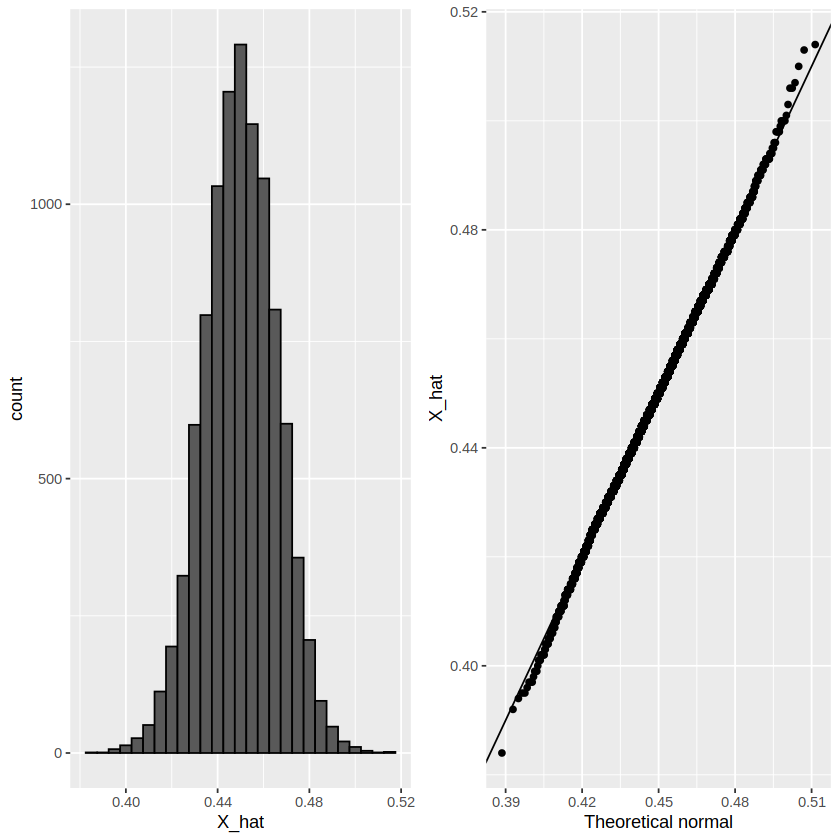

In [24]:
install.packages( "gridExtra" )
library( gridExtra )
library( dplyr )
library( ggplot2 )

p1 <- data.frame( X_hat=X_hat ) %>% ggplot( aes( X_hat ) )  +
    geom_histogram( binwidth=0.005, color="black" )

p2 <- data.frame( X_hat=X_hat ) %>% ggplot( aes( sample=X_hat) ) +
    stat_qq( dparams = list( mean=mean(X_hat), sd=sd(X_hat) ) ) +
    geom_abline() +
    ylab( "X_hat" ) +
    xlab( "Theoretical normal" )

grid.arrange( p1, p2, nrow=1 )

Note that in real life, we would never be able to run such an experiment because we don't know *p*. But we could run it for varios values of *p* and sample sizes *N* and see that the theory does indeed work well for most variables.



### The Spread



The competition is *to predict the spread*, not the *proportion p*. However, because we are assuming there are only two parties, we know that *the spread* is just:

$$p - (1 - p) = 2p - 1$$

So everything we have done can easily be adapted to estimate to *p - 1*. Once we have our estimate, $\overline{X}$, and our estimate of our standard error of $\overline{X}$, we estimate the spread by $2\overline{X} - 1$, just plugging in the $\overline{X}$ where we should have a *p*. And, since we're multiplying a random variable by 2, we know that the standard error goes up by 2, ($2\hat{SE}(\overline{X})$).

Note that substracting the 1 does not add any variability, so it does not affect the standard error.

For our first example, with just the 25 beads, our estimate *p* was *0.48* with a margin of error of *0.2*. This means that our estimate of the spread is *4\%* points, *0.04*, with a margin of error of *40\%*, *0.4*.

Again, not a very useful sample size. But the point is *that once we have an estimate and standard error for p, we have it for the **spread = 2p - 1***.



### Bias: Why not run a very large poll?



Note that for realistic values of *p*, between *0.35* and *0.65* for the popular vote, if we run a very large poll, with say $100,000$ people, theory would tell us that we would predict the election almost frecuently, since the largest possible margin fo error is about *0.3\%*.

Here are the calculations that were used to determin that:

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



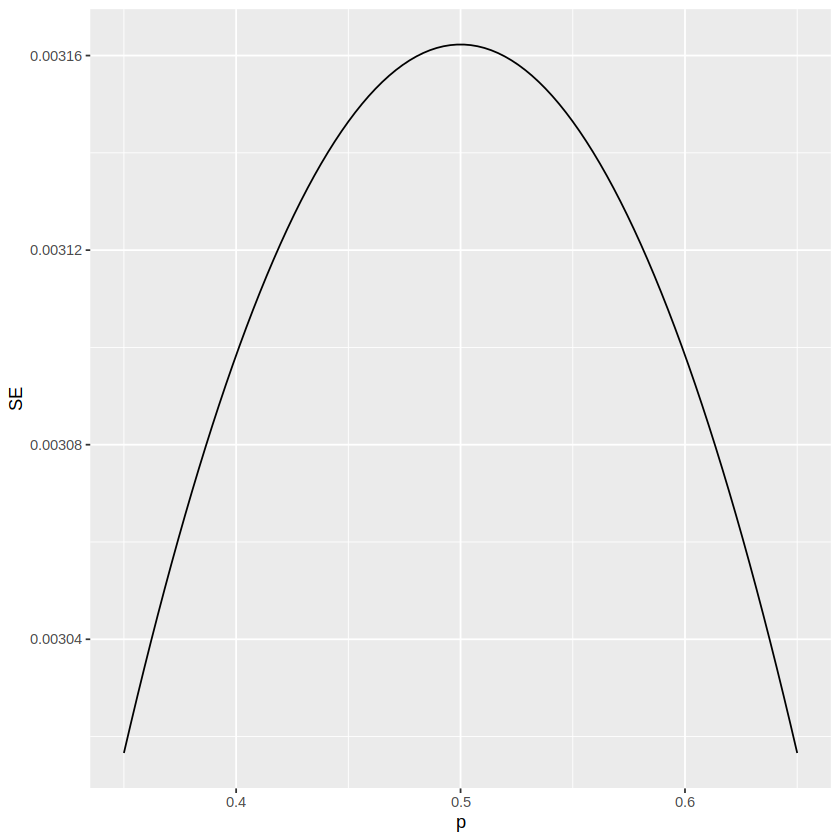

In [1]:
library( tidyverse )

N <- 100000 
p <- seq( 0.35, 0.65, length=100 )
SE <- sapply( p, function(x) 2*sqrt(x*(1-x)/N) )
data.frame( p=p, SE=SE ) %>% ggplot( aes(p,SE) ) + 
            geom_line()

The graph showing us th standard error fro several values of *p*. If we fix *N=100,000*. But running polls with a sample size of *100,000* is very expensive, but a more important reason because there're no pollsters that conducting polls very large, it's that *theory has its limitations*:

* Polling is much more complicated than picking beads from an urn. While the beads are either blue or red, when you ask to the people might lie to you.
* Usually you're conducting these pools by phone, yout might miss people thatn don't have phones.
* They might vote differently than do.
* The most different way an actual poll is from our urn model is that we actually don't know for sure who is in our population and who is not.

We face the following questions.

* How do we know who is going to vote?
* Are we reaching all possible voters?

Even if our margin of error is very small, it may not be exactly right that our expected values is *p*. We call this **bias**. Historically, we observe that polls are *biased*, although not by that much. The typical bias appears to be between *1\%* and *2\%*.

<hr/>

### Exercises



#### Exercise 1: Sample average

Write function called *take_sample* that takes the proportion of Democrats, *p*, and the sample size *N* as arguments and: 

* Returns the sample average of *Democrats (1)* and *Republicans (0)*. 
* Calculate the sample average if the proportion of Democrats equals *0.45* and the sample size is *100*.

**Instructions** 

1. Define a function called *take_sample* that takes *p* and *N* arguments.
2. Use the *sample* function as the first statement in your function to sample *N* elements from a vector of option where Democrats are assigned value *1* and Republicans are assigned value *0*, in that order.
3. Use the *mean* function as the second statement in your function to find the average value of the random sample.

In [10]:
take_sample <- function( p, nsize ) {
    x <- sample( c(0,1), size=nsize, replace=TRUE, prob=c(1-p, p)) # return sample average of Democrats
    average <- mean( x )                                           # calculate the sample average
    return(average)
}

set.seed( 1 )           # to make sure your answer matches the expected result after random sampling
p <- 0.45
N <- 100 

result <- take_sample( p, N )
result

[1] 0.46

Solution explain: The solution to the exercise is a function called take_sample that takes two arguments: p and N.

The function take_sample uses the sample function to randomly select N elements from a vector of options where Democrats are assigned the value '1' and Republicans are assigned the value '0'. The prob argument in the sample function is used to specify the probability of each option. In this case, the probability of selecting a Democrat (1) is p and the probability of selecting a Republican (0) is 1 - p. The replace = TRUE argument means that the same option can be selected more than once.

The mean function is then used to calculate the average value of the randomly selected elements. This is the proportion of Democrats in the sample.

The set.seed function is used to set the seed of R's random number generator, which is useful for reproducibility. The same set of random numbers will be generated each time the code is run.

The variables p and N are defined as the proportion of Democrats in the population and the number of people polled, respectively. The take_sample function is then called with these arguments to determine the sample average of N randomly selected people from a population containing a proportion of Democrats equal to p. The result is printed to the console.

#### Exercise 2: Distribution of errors - 1

Assume the proportion of Democrats in the population *p = 0.45* and that your sample size *N=100* polled voters. The *take_sample* function you defined previously generates our estimate, $\overline{X}$.

* Replicate the random sampling *10,000* times and calculate $p - \overline{X}$ for each random sample. Save these differences as a vector called *errors*.
* Find the *average of errors* and plot a histogram of the distribution.


**Instructions** 

1. The function *take_sample* that you defined in the previous exercise has already been run for your.
2. Use the *replicate* function to replicate subtracting the result of *take_sample* from the value of *p* *10,000* times.
3. Use the *mean* function to calculate the average of the difference between the sample average and actual value of *p*.

In [23]:
p <- 0.45                       # Democrats probability
N <- 100                        # n-samples
B <- 10000                      # times to replicate

set.seed( 1 )
errors <- replicate( B, {
    p - take_sample( p, N )
})
md <- mean( errors )
y <- (md / 100000)
print(y)

[1] -4.9e-10


Solution explication: This solution solves the exercise by following the instructions step by step.

First, it defines p as the proportion of Democrats in the population being polled and N as the number of people polled. These are the parameters that will be used in the take_sample function.

Next, it sets B as the number of times we want to replicate the sampling process. This is the number of times the replicate function will run.

The set.seed function is used to ensure that the random sampling process is reproducible. This means that every time you run the code, you will get the same result.

Then, it creates an object called errors that stores the differences between the actual value of p and the sample average for each replication. This is done by subtracting the result of the take_sample function from p inside the replicate function.

Finally, it calculates the mean of the errors object using the mean function. This gives the average of the differences between the sample average and the actual value of p over all the replications. This value is then printed to the console.

So, this solution correctly implements the instructions of the exercise by replicating the sampling process a large number of times and calculating the average difference between the sample average and the actual value of p

#### Exercise 3: Distribution of errors - 2

In the last exercise, you made a vector of differences between the actual value for *p* and an esimate, $\overline{X}$. We called these differences between the actual and estimated values **errors**.

The *errors* object has already been loaded for you. Use the *hist* function to plot a histogram of the values contained in the vector *errors*. Which statement best desribes the *distribution of errors*?.

**Instructions** 
 Possible answers:

1. The errors are all about 0.05.
2. The errors are all about -0.05.
3. The errors are symmetrically distributed around 0.
4. The errors range from -1 to 1.

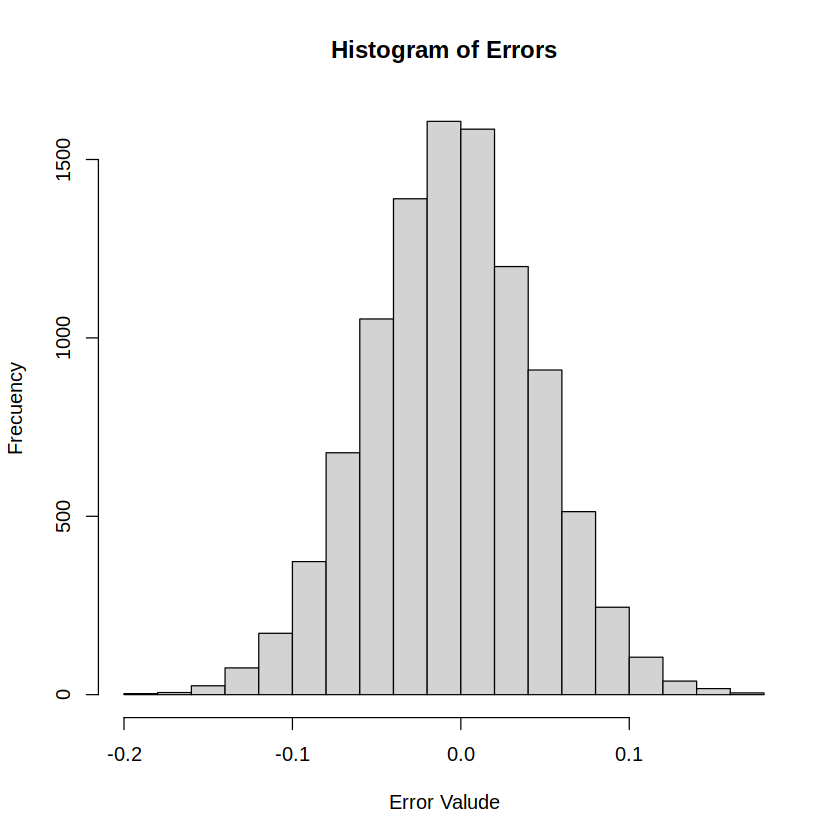

In [15]:
hist( errors, main="Histogram of Errors", xlab="Error Valude", ylab="Frecuency" )

Interpreting the histogram:

1. Symmetry: If the histogram is roughly symmetric, it suggests that the errors are centered around zero, indicating that, on average, your estimates are unbiased.
2. Skewness: If the histogram is skewed to the right (positively skewed), it means that there are more negative errors (underestimates). If it's skewed to the left (negatively skewed), there are more positive errors (overestimates).
3. Spread: The spread of the histogram gives you an idea of how variable the errors are. A wider spread indicates higher variability.
4. Outliers: Look for any extreme values (outliers) in the histogram. Outliers can provide insights into cases where your estimation might be substantially off.

Solution: The mean errors is $-4.9e-05 \approx -0.000049$ then the errors are distributed around 0.


#### Exercise 4: Average size of error

The error $p - \overline{X}$ is a random varible. In practice, the error is not observed because we do not know the actual proportion of Democratic voters, *p*. However, we can describe the size of the error by constructing a simulation.

What is the *average size of the error* if we define the size by taking the absolute value $|p-\overline{X}|$?.

**Instructions**

* Use the sample code to generate *errors*, a vector of $|p-\overline{X}|$.
* Calculate the absolute value of *errors* using the *abs* function.
* Calculate the average of these values using the *mean* function.


In [25]:
p <- 0.45 
N <- 100 
B <- 10000

set.seed( 1 )

errors <- replicate( B, p - take_sample( p,N ) )
mean( abs(errors) )

[1] 0.039267

#### Exercise 5: Standard deviation of the spread

The standard error is related to the typical *size of the error* we mak when predicting. We say *size* because, as we just saw, the errors are centered around 0. In that sense, the typical error is 0. For mathematical reasons related to the *central limit theorem*, we actually use the *standard deviation of errors* rather than the average of the absolute values.

As we have discussed, the standard error is the square root of the average squared distance ($\overline{X}-p)^2$. The ***standard deviation** is defined as the square root of the distance squared*.

Calculate the *standard deviation of the spread*.

**Instructions** 

* Use the sampl code to generate *errors*, a vector of $|p-\overline{X}|$.
* Use $^2$ to square the distances.
* Calculate the average squard distance using the *mean* function.
* Calculate the square root of these values using the *sqrt* function.

In [31]:
p <- 0.45 
N <- 100 
B <- 10000

set.seed( 1 )

errors <- replicate( B, p - take_sample(p,N))

sdev <- sd(errors)
print( paste( "With sd function, Standard Deviation of Errors: ", sdev) )

sq_errors <- errors^2
sdev2 <- sqrt( mean(sq_errors) )
print( paste( "With manual calculus, Standard Deviation(2) of Errors: ", sdev2) )

[1] "With sd function, Standard Deviation of Errors:  0.0495018448369778"
[1] "With manual calculus, Standard Deviation(2) of Errors:  0.0494993939356837"


#### Exercise 6: Estimating the standard error

The theory we just learned tells us what this standard deviation is going to be because it is the standard error of $\overline{X}$.

Estimate the *standard error* given an expected value of *0.45* and a sample size of *100*.

**Instructions** 

* Calculate the standard error using the *sqrt* function.

We know that 
$$\text{standard error} = SE = \sqrt{\frac{p*(1-p)}{N} }$$


In [38]:
p <- 0.45 
N <- 100 

SE <- sqrt((p*(1-p))/N)
print(SE)


[1] 0.04974937


#### Exercise 7: Standard Error of the estimate.

In practice, we don't know *p*, so we construct an estimate of the theoretical prediction based by plugging in $\overline{X}$ for *p*. Calculate the *standard error of the estimate* ($\hat{SE}(\overline{X})$).

**Instructions** 

* Simulate a poll X using the *sample* function.
* When using the sample function, *create a vector using c()* that contains all possible polling options where '1' indicates a Democratic voter and '0' indicates a Republican voter.
* When using the sample function, use replace = TRUE within the sample function to indicate that sampling from the vector should occur with replacement.
* When using the sample function, use prob = within the sample function to indicate the probabilities of selecting either element (0 or 1) within the vector of possibilities.
* Use the *mean* function to calculate the average of the simulated poll, X_bar.
* Calculate the *standard error* of the $\overline{X}$ using the *sqrt* function and print the result.



In [42]:
p <- 0.45 
N <- 100

set.seed( 1 )

X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p,p) )

X_bar <- mean(X)

X_med <- (X_bar * (1 - X_bar)) / N
ese <- sqrt( X_med)
print( ese )


[1] 0.04983974


#### Exercise 8: Plotting the standard error

The standard error estimates obtained from the *Monte Carlo Simulation*, the theoretical preciction, and the estimate of the theoretical prediction are all very close, which tells us that the theory is working. This gives us a practical approach to knowing the typical error we will make if we predict *p* with $\hat{X}$. The theoretical result gives us an idea of how large a sample size is required to obtain the precision we need. Earlier we learned that the largest standard errors occur for *p=0.5*.

Create a plot of the largest standard error for *N* ranging from 100 to 5000. Based on this plot, how large does the sample size have to be to have a standard error of about $1\%$?.


Sample size for 1% standard error: 2475.758 


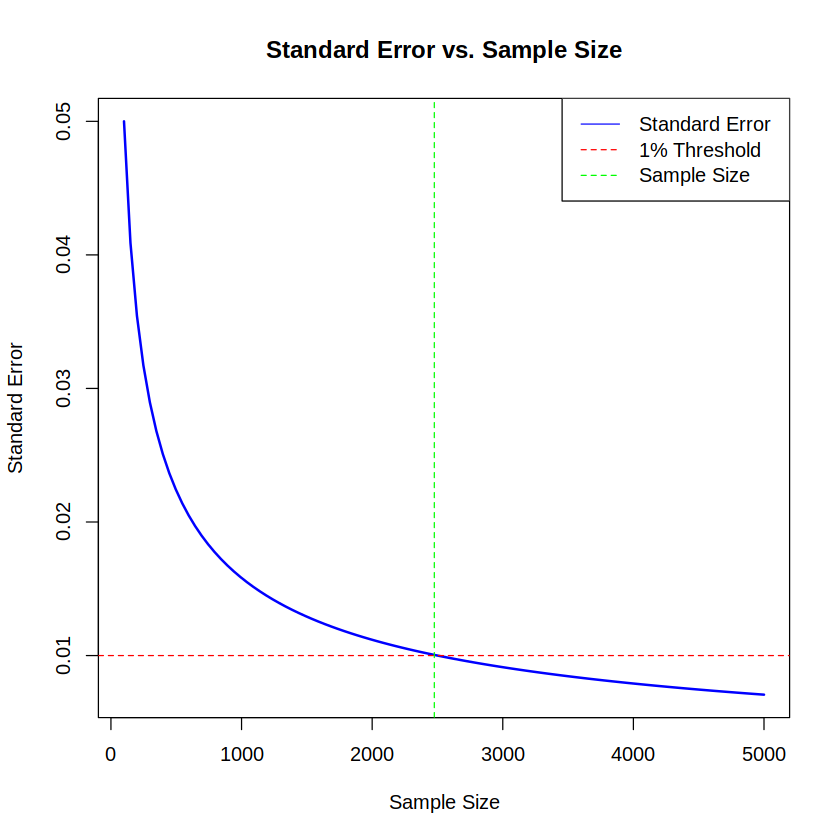

In [47]:
N <- seq( 100, 5000, len=100 )
p <- 0.5 
se <- sqrt(p*(1-p)/N)
#print( paste( "Estandard error: ", se ) )

plot(N, se, type = "l", col = "blue", lwd = 2,
     xlab = "Sample Size", ylab = "Standard Error",
     main = "Standard Error vs. Sample Size")

# Add a horizontal line at y = 0.01 for reference (1%)
abline(h = 0.01, col = "red", lty = 2)

# Identify the sample size where standard error is approximately 1%
index <- which.min(abs(se - 0.01))
abline(v = N[index], col = "green", lty = 2)

# Add a legend
legend("topright", legend = c("Standard Error", "1% Threshold", "Sample Size"), col = c("blue", "red", "green"), lty = c(1, 2, 2))

# Print the sample size where standard error is approximately 1%
cat("Sample size for 1% standard error:", N[index], "\n")

Solution: The sample size must to be **2500**

#### Exercise 9: Distribution of $\hat{X}$

For *N=100*, the central limit theorem tells us that the *distribution of* $\hat{X}$ is \ldots

**Instructions**

* Practically igual to *p*.
* approximately normal with expected value *p* and *standard error* = $\sqrt{p(1-p)/N}$.
* approximately normal with expected value $\overline{X}$ and *standard error* = $\sqrt{\overline{X}(1-\overline{X})/N}$.
* Not a random variable

**Solution**:

approximately normal with expected value *p* and *standard error* = $\sqrt{p(1-p)/N}$.

#### Exercise 10: Distribution of the errors

We calculated a vector *errors* that contained, for each simulated sample, the difference between the actual value *p* and our estimate $\hat{X}$. The errors $\overline{X} - p$ are:

**Instructions** 

* practically equal to 0.
* approximately normal with expected value *p* and *standard error* = $\sqrt{p(1-p)/N}$.
* approximately normal with expected value $\overline{X}$ and *standard error* = $\sqrt{\overline{X}(1-\overline{X})/N}$.
* Not a random variable

**Solution**:


approximately normal with expected value *p* and *standard error* = $\sqrt{p(1-p)/N}$.

#### Exercise 11: Plotting the errors

Make a *qq-plot* of the errors you generated presiously to see if they follow a normal distribution.

**Instructions**

* Run the supplied code.
* Use the *qqnorm* function to produce a *qq-plot* of the errors
* Use the *qqline* function to plot a line showing a normal distribution.


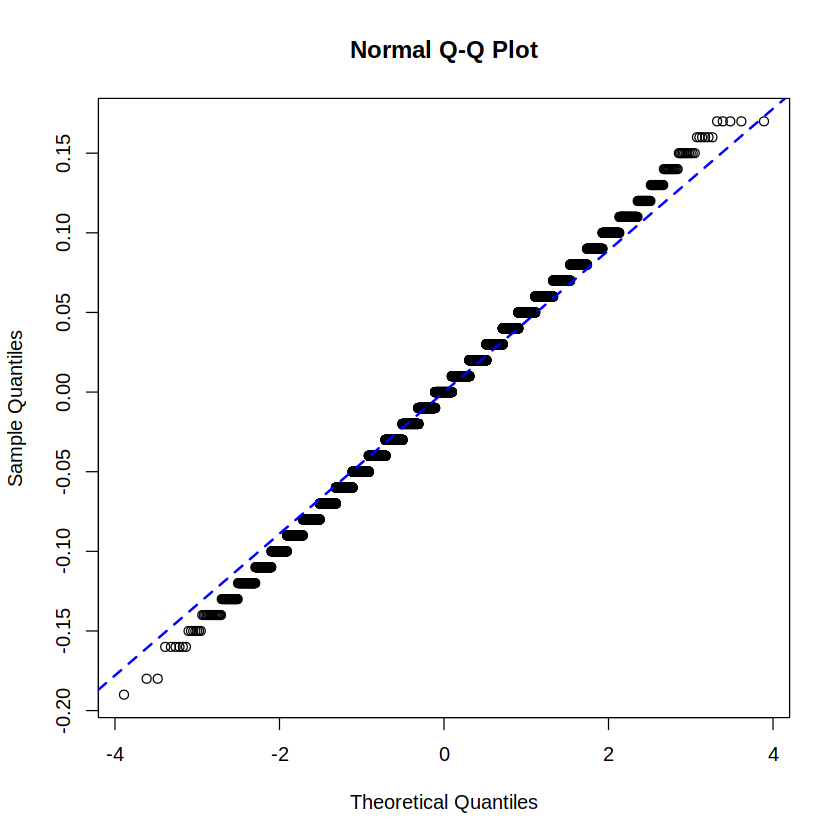

In [50]:
p <- 0.45
N <- 100
B <- 10000
set.seed( 1 )

errors <- replicate( B, p - take_sample( p,N ) ) 

qqnorm( errors )
qqline( errors, col="blue", lwd=2, lty=2 )


#### Exercise 12: Estimating the probability of a specific value of $\overline{X}$.

If *p=0.45* and *N=100*, use the central limit theorem to estimate teh probability that $\overline{X} > 0.5$.

**Instructions**

* Use *pnorm* to define the probability that a value will be greater than *0.5*.

In [53]:
p <- 0.45 
N <- 100

m <- p
sd <- sqrt(p*(1-p)/N)

z_score <- (0.5 - m) /sd 
probability <- 1 - pnorm(z_score)
print(probability)


[1] 0.1574393


#### Exercise 13: Estimating the probability of a specific error size.

Assume you are in a practical situation and you don't know *p*. Take a sample of size *N=100* and obtain a sample average of $\overline{X} = 0.51$.

What is the CLT approximation for the probability that your error size is equal or larger than *0.01*?.

**Instructions**

* Calculate the standard error of the sample using the *sqrt* function.
* Use *pnorm* twice to define the probabilitis that  a value will be less than *-0.01* or greater than *0.01*
* Combine these results to calculate the probability that the size error will be *0.01* or larger.

In [55]:
N <- 100
X_hat <- 0.51 
prob <- 0.01

se_hat <- sqrt( X_hat * (1 - X_hat) / N )

1 - pnorm( prob, 0, se_hat ) + pnorm( (-1*prob), 0, se_hat )

[1] 0.8414493

Explain solution: The solution first defines N as the number of people polled and X_hat as the sample average. These are just initial values that are needed for the calculations.

Next, it calculates the standard error of the sample average (se_hat). The standard error is a measure of the statistical accuracy of an estimate, equal to the standard deviation of the theoretical distribution of a large population of such estimates. It is calculated as the square root of the variance of the sample proportion, which is X_hat*(1-X_hat)/N.

Then, it calculates the probability that the error is 0.01 or larger. This is done by using the pnorm function twice, once for -0.01 and once for 0.01. The pnorm function gives the cumulative distribution function for a specified mean and standard deviation, in this case, 0 and se_hat respectively.

The pnorm function returns the probability that a normally distributed random number will be less than the specified value. So, pnorm(.01, 0, se_hat) gives the probability that a value will be less than 0.01 and pnorm(-0.01, 0, se_hat) gives the probability that a value will be less than -0.01.

Finally, these two probabilities are subtracted from 1 to get the probability that the error size will be 0.01 or larger. This is because the total probability is 1, so subtracting the probabilities of the error being less than 0.01 and greater than -0.01 gives the probability of the error being 0.01 or larger




<hr/>

## Section 3: Confidence Intervals and p-Values



Confidence intervals are a very useful concept. A version of these come from the **ggplot**, geometry **geom_smooth**.

Here's an example using some weather data.

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



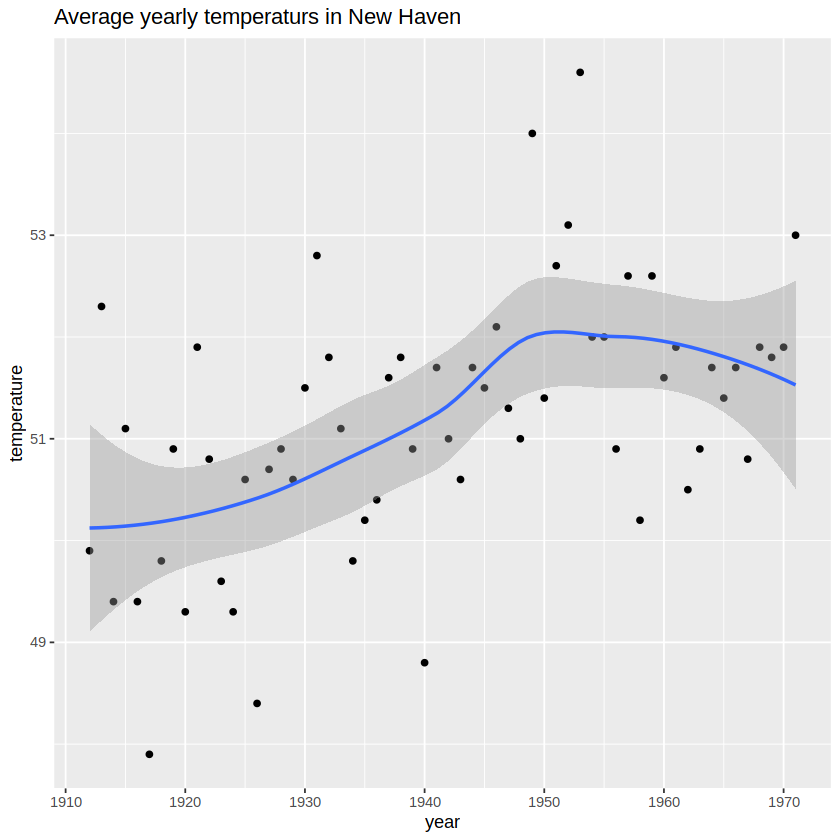

In [4]:
library( tidyverse )
library( ggplot2 )

data( "nhtemp" )
data.frame( year=as.numeric( time(nhtemp) ), temperature=as.numeric(nhtemp)) %>%
    ggplot( aes(year, temperature) ) +
    geom_point() + 
    geom_smooth() + 
    ggtitle( "Average yearly temperaturs in New Haven" )

We will later learn how this curve is formed, but note the shaded area around  the curve. This shaded curve is created using the concept of **confidence intervals**. 

In our competion, we were asked to give an interval. If the interval we submit includes the actual *proportion p*, you get half the money you spent on your poll, back and pass to the next stage of the competition. Onew way to pass the second round of competition, was to report a very large interval, the interval *0 to 1*, this is guaranteed to include *p*; however, with an interval this big, we have not chance of winning the competition.

* If your are an election forecaster, and predict the spread will be between *-100 and 100*, you'll be ridiculed for stating the obvious.
* Even a smaller interval, such as saying that the spread will be between *-10\% and 10\%* will not be considered serious.
* A bold pollster that reports very small intervals, and misses the mark most of the time will not be considered a good pollister.

The smaller the interval we report, the smaller our chance of passing to the second round. We wont to be somewhere in between, *confidence intervals* will help us get there.

We can use the *statistical theory* we have learned to compute, for any given interval, the probability that it includes *p*. Similarly, if we are asked to create an interval with, say, at *95\%* chance of including *p*, we can do that as well. These are called *95\% confidence intervals*.

When pollsters report an estimate and a margin of error, they are reporting a *95\% confidence interval*. 

Let's show hwo this works mathematically:

* We want to know the probability that the interval $[\overline{X} - 2\hat{SE}(\overline{X}), \overline{X} + 2\hat{SE}(\overline{X})]$ is estimated standard error contains the actual proportion of *p*.

1. Note that the start and end of this interval are random variables. Every time that we take a sample, they change. To illustrate this, we're going to run a *Monte Carlo simulation*.

In [9]:
p <- 0.45 
N <- 1000

X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p,p) )
X_hat <- mean(X)

SE_hat <- sqrt( X_hat * (1 - X_hat) / N )
c( X_hat - (2*SE_hat), X_hat + (2*SE_hat) )


[1] 0.400671 0.463329

Note that the interva we get when we write this code is different from what we get if we run that same code again. If we keep sampling and creating intervals, we will see that this is due to random variation.

2. To determine the probability that the interval includes *p*, we need to compute this probability. By subtracting and dividing the same quantities in all parts of the equation, we get that the equation is equivalent to this.
$$
\begin{array}{l}
Pr( \overline{X} - 2\hat{SE}(\overline{X})\;\leq\; \overline{X} + 2\hat{SE}(\overline{X}))
\\
\\
Pr\left(-2 \leq \frac{\overline{X} - p}{\hat{SE}(\overline{X})} \leq 2\right)
\end{array}
$$


The term in the middle (second equation) is an approximately *normal random variable*, with *expected value 0* and *standard error 1*, which we have been denoting with capital *Z*.
$$Pr(-2 \leq \mathit{Z} \leq 2)$$
So what we have is , what is th probability of a standard normal variable being between *-2 and 2*?, and this is about *95\%*, we have a *95\%* confidence interval.

If we want to have a larger probability, say *99\% confidence interval*, we need to multiply by whatever *Z*, satisfies the following equation $Pr( -z \leq \mathit{Z} \leq z ) = 0.99$. Note that by using the quantity that we get by typing this code. which is about *2.576*, will do it, because by definition the *pnorm* of what we get, when we type *qnomr(0.995)*, is by definition *0.995*.


In [12]:
z <- qnorm( 0.995 )
z

pnorm( qnorm(0.995) )

[1] 2.575829

[1] 0.995

And by symmetry, *pnorm* of *1 - qnorm(0.995)* is *1-0.995*

In [17]:
pnorm( 1-0.995 )


[1] 0.5019947

So now, we compute:

In [16]:
pnorm(z) - pnorm(-z)

[1] 0.99

we get *99\%*, this is what we wanted.

We can use this approach for any **percentile *q***. We use $1-((1-q)/2)$, why this number, because of what we just saw:
$$
\begin{array}{l}
z = 1 - \frac{(1 - q)}{2} 
\\
\\
1 - \frac{1 - q}{2} + \frac{1 - q}{2} = 1 - \frac{2(1-q)}{2} = 1 -1 + q = q
\end{array}
$$


Also note, that to get exactly *0.95*, we use a slightly smaller number than 2. How do we know? We type *qnorm(0.975)* and we see that the value that we should be using to get exactly *95\% confidence interval is 1.96*.

In [19]:
z <- qnorm(0.975)
print( paste( "Confidence interval of 95%: z = ", z ) )

[1] "Confidence interval of 95%: z =  1.95996398454005"


### Visual clarification of *Confidence Intervals*



Recall that to define a confidence interval size *q*, we solve for $z = 1 - \frac{1-q}{2}$. For example, to find a *95\%* confidence interval, we solve for $z = qnorm(0.975)$.

In [31]:
z <- qnorm( 0.975)
print( paste("qnorm(0.975) -> z =", z ) )

z <- qnorm( 0.95)
print( paste("qnorm(0.95)  -> z =", z ) )

[1] "qnorm(0.975) -> z = 1.95996398454005"
[1] "qnorm(0.95)  -> z = 1.64485362695147"


A common source of confusion is why *qnorm(0.975)* is used rather than *qnorm(0.95)* to find a *95\%* confidence interval. This is because the normal distribution is symmetric and our confidence interval should cover the middle *95\%* of the distribution:

<center><img src="images/sec03-01.png" width=300 height=200/></center>

* The upper limit if this *95\%* confidence interval will be $\overline{X} + qnorm(0.975)*\hat{SE}$, which removes the *2.5\%* highest observations.
* The lower limit if this *95\%* confidence interval will be $\overline{X} - qnorm(0.975)*\hat{SE}$, which removes the *2.5\%* lowest observations.

We can run a *Monte Carlo* simulation to confirm that a *95\%* confidence interval includes *p* *95\%* of the time. We will use *between* function to test whether our values falls within our range, this function return *logical value*:

* TRUE indicate that our value is larger than the lower bound and smaller the upper bound.

Now we're going to construct the confidence interval inside de call to replicate. In the last line, we're going to ask, is *p* included in the interval?. We use the *between* function and return true or false.

To compute how often it happended, we compute the *mean of that vector of true and false*.

In [15]:
library( tidyverse )

p <- 0.45 
N <- 1000
B <- 10000

inside <- replicate( B, {
    X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p,p) )
    X_hat <- mean(X)
    SE_hat <- sqrt( X_hat * (1-X_hat) / N )
    between( p, X_hat - (2*SE_hat), X_hat + (2*SE_hat) )
})
mean( inside )

[1] 0.9545

<center><img src="images/sec03-02.png" /></center>

This plot shows you the first few confidence intervals that were generated in our *Monte Carlo* simulation. We created simulations so we know what *p* is, it's represented with a vertical black line. We can see the *confidence intervals* varying; each time, they fall in slightly different places, this is because they're random variables.

We also know that most of the times, *p* is included inside the confidence interval, but *p* is not moving because is not a random variable.

Also see that, every once in a while, we miss *p*, these cases, confiance intervales, are shonw in red. We should only see about *5\%* of the intervals in red because they're *95\%* confidence intervals.


### The correct language



It is important to remember that it is the *intervals* that are at *random*, not *p*. In the graph, we could see that the *random intervals* that were moving around *p*, while *p* remained fixed, and it was represented with a vertical line.

The 95\% relates to the probability that the random interval falss on top of *p*. 

Saying that *p* has a 95\% chance of being between this and that is technically an incorrect statement, because *p* is not random.

In summary:

* The 95\% confidence intervals **are random**, but ***p* is not random**.
* The **95\% refers to the *probability*** that the random intervals falls on top of *p*.
* Is **technically incorrect** to state that ***p* has a 95\% chance of being in between two values**, its implies *p* is random.



### Power 


Pollsters do not become successful for providing correct confidence intervals, but rather who will win.

When we took a sample of size *N=25*, the confidence interval for the spread was $[-0.44, 0.36]$, this includes *0*.

In [18]:
N <- 25
X_hat <- 0.48 

(2*X_hat - 1) + c(-2,2)*2*sqrt(X_hat*(1-X_hat)/ N )

[1] -0.4396799  0.3596799

If we were pollsters and we were forced to make a declaration about the election, we would have no choice that to say, it's a tossup.

A problem with our poll results, is that given the sample size, and the value of *p*, we would have to sacrifice on the probability of an incorrect call to crate an interval, that does not include 0, an interval that makes a call of who's going win.

The fact that our interval includes 0, it does not mean that this election is close, it only means that we have a small sample size. In statistical textbooks, this is called **lack of power**.

In the context of pools, **power** can be thought of as the **probability of detecting a spread different from 0**. By increasing our sample size, we lower our standard error, and therefore have a much better chance of detecting the direction of the spread.


### p-Values



The **p-Values** are related to *confidence intervals*. Let's consider the blue and red bead example. Suppose that rather than wanting to estimate the spread or the proportion of blue; I'm insterested only in, are there more blue beads than red beads?. Another way to ask that is:

* is *spread = 2p - 1* bigger than *0*?

Suppose we take a random sample of, say, 100 beads, and we observ 52 blue beads. This gives us a spread of *4\%*. This seems to be pointing to there being more blue beads than red beads, because $4\% > 0$.

$$
\text{spread} = 2*\frac{52}{100} - 1 = 0.04 \implies 4\%
$$

However, as data scientists, we need to be skeptical. We know there is chance involved in this process, and we can get a 52 even when the actual spread is 0. The **null hypothesis** is the **skeptic's hypothesis**.

In this case, it would be the spread is 0. We have observed a random variable $2\overline{X} - 1 = 0.04$, and the *p-value* is the answer to the question: how likely is it to see a value this large when the null hypothesis is true? So we write, what's the $Pr(|\overline{X} - 0.5| > 0.02)$?. That's the same as asking, what's the chance that the spread is 4 or more?

The *null hypothesis* is that the spread is 0 or that *p* is a half.

* Under the null hypothesis, we know that this quantity here is a **standard normal**:
  $$
  \sqrt{N}\frac{\overline{X} - 0.5}{\sqrt{ 0.5\ast(1 - 0.5)}}
  $$
  We've taken a *random variable* and divided it by its *standard error* after subtracting its *expected value*.


Using this equation, we can compute the probability which is a *p-value*:
$$
Pr\left(\sqrt{N}\frac{|\overline{X} - 0.5|}{\sqrt{ 0.5\ast(1 - 0.5)}} > \sqrt{N}\frac{0.02}{\sqrt{ 0.5\ast(1 - 0.5)}}  \right)
$$
which reduces to this equation:
$$
Pr\left(\sqrt{N}\frac{|\overline{X} - 0.5|}{0.5} > \mathit{Z}\right)
$$
where $\mathit{Z}$ is a **standard normal**.

Now we can use code to compute this.

In [19]:
N <- 100
z <- sqrt(N)*(0.02/0.5)
print(z)
1 - ( pnorm(z) - pnorm(-z) )

[1] 0.4


[1] 0.6891565

we compute the probability, which is equal to 69\% in this case. This is the **p-Value**, there's actually a large chance of seeing 52 blue beads or more under the *null hypothesis* that there is the same amount of blue beads as red beads.

So the 52 blue beads are not very strong evidence.


#### Another explanation of p-Values


The *p-Value* is the *probability of observing a values as extreme or more extreme than the result given that the **null hypothesis** is true*. In a *normal distribution*, this refers to the probability of observing a *Z-score* whose absolute value is as high or higher than the *Z-score* of interest.

Suppose we want to find the *p-Value* of an observation *2 standard deviations larger than the mean* ($2*\hat{SE}(\overline{X})$), this means we are looking for anything with $|z|\geq 2$.

Graphically, the *p-value* gives the probability of an observation that's least as far away from the mean or further. This plot shows a standard normal distribution, centered at *z = 0*, with a *standard deviation = 1*. The shaded tails are the region of the graph that are $2*\hat{SE}(\overline{X})$ or more away from the mean:

<center><img src="images/sec03-03.png" /></center>

* The right tail can be found with *1 - pnorm(2)*.
* If we want to both tails, we want to find the probability of any observation as far away from the mean or farther, in either direction. The distribution is symetrical, we know that our desired values is just *2\*(1-pnorm(2))*.

Recall that, by default, *pnorm* gives the **CDF** for a normal distribution with a mean $\mu = 0$ and standard deviation $\sigma = 1$. To find *p-values* for a given *z-score*, *z* is a normal distribution, use $2\ast(1-pnorm( z, \mu, \sigma ))$ instead.

<hr/>

### Exercises (Section 3)



#### Exercise 1: Confidence Interval for *p*

For the following exercises we will use actual poll data from the election 2016 election. The exercises will contain *pre-load data from the **dslabs** pacakage*.

In [21]:
my_packages <- c( "dslabs", "tidyverse" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [22]:
data( "polls_us_election_2016" )
View( polls_us_election_2016[1:10, ] )          # show 10 first rows

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA
7,U.S.,2016-11-02,2016-11-06,CBS News/New York Times,A-,1426,lv,45.00,41.00,5.00,NA,45.11649,40.92722,4.341786,NA
8,U.S.,2016-11-03,2016-11-05,NBC News/Wall Street Journal,A-,1282,lv,44.00,40.00,6.00,NA,43.58576,40.77325,5.365788,NA
9,New Mexico,2016-11-06,2016-11-06,Zia Poll,NA,8439,lv,46.00,44.00,6.00,NA,44.82594,41.59978,7.870127,NA


* We will use all the national polls that ended within a few weeks before the election.
* Assume there are only two candidates and construct a 95\% confidence interval for the election night proportion *p*.

**Instructions**

* Use *filter* function to subset the data set for the poll data you want. Include polls that ended on or after October 31, 2016 (enddate). Only include polss that took place in the US. Call this filtered object *polls*.
* Use *nrow* to make sure you created a filtered object *polls* that contains the correct number of rows.
* Extract the sample size *N* from the first poll in your subsect object *polls*.
* Convert the percentage of Clinton voters (*rawpoll_clinton*) from the first poll in *polls* to a proportion, *X_hat* ($\hat{X}$). Print this value to the console.
* Find the *standard error* of $\hat{X}$ given *N*. Print this result to the console.
* Calculate the 95\% confidence interval of this estimate using the *qnorm* function.
* Save the lower and upper confidence intervals as an object called *ci*. Save the lower confidence interval first.

We need to use *dplyr::filter* due to the *tydiverse library conflicts* that give errors with *filter* and *lag* functions.

In [24]:
polls <- polls_us_election_2016 %>% filter(enddate >= "2016-10-31" & state == "U.S.") 

nrow( polls )

[1] 70

In [26]:
N <- polls$samplesize[1]            # or N <- head( polls, 1 )[,"samplesize"]
N

[1] 2220

In [27]:
X_hat <- polls$rawpoll_clinton[1]/100
X_hat

[1] 0.47

In [28]:
se_hat <- sqrt( X_hat * (1-X_hat) / N )
se_hat

[1] 0.01059279

In [29]:
ci_lower <- X_hat - qnorm(0.975) * se_hat
ci_upper <- X_hat + qnorm(0.975) * se_hat
ci <- c(ci_lower, ci_upper)
ci

[1] 0.4492385 0.4907615



#### Exercise 2: Pollster results for *p*

Create a new object called *pollster_results* that contains the pollster's name, the end date of the poll, the proportion of voters who declared a vote for Clinton, the standard error of this estimate, and the lower and upper bounds of the confidence interval for the estimate.

**Instructions**

* Use the *mutate* function to define four new columns: *X_hat*, *se_hat*, *lower* and *upper*. Temporarily add these columns to the *polls* object that has already been loaded for your.
* In the *X_hat* column, convert the raw poll results for Clinton to a proportion.
* In the *se_hat* column, calculate the standard error of *X_hat* for each poll using the *sqrt* function.
* In the *lower* column, calculate the lower bound of the 95\% confidence interval using the *qnorm* function.
* In the *upper* column, calculate the upper bound of the 95\% confidence interval using the *qnorm* function.
* Use the *select* function to select the columns from *polls* to save to the new object *pollster_results*.

In [33]:
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA


In [36]:
pollster_results <- polls %>% select("pollster", "enddate") %>%
                        mutate(
                            X_hat = polls$rawpoll_clinton/100,
                            se_hat = sqrt( X_hat * (1-X_hat) / polls$samplesize ),
                            lower = X_hat - qnorm(0.975) * se_hat,
                            upper = X_hat + qnorm(0.975) * se_hat
                        )

#View( pollster_results )


#### Exercise 3: Comparing to actual results *p*

The final tally for the popular vote was Clinton 48.2\% and Trump 45.1\%. Add a column called *hit* to *pollster_results* that states if the confidence interval included the true proportion *p=0.482* or not. What the proportion of confidence invervals include *p*?

**Instructions**

Finish the code to create a new object called *avg_hit* by following these steps

* Use the *mutate* function to define a new variable called *hit*.
* Use logical expressions to determine if each values in *lower* and *upper* span the actual proportion.
* Use the *mean* function to determine the average value in *hit* and summarize the results using *summarize*.

Solution explanation: 

1. The head function is used to examine the first few rows of the pollster_results data frame. This is not necessary for the solution, but it helps to understand the structure of the data.
2. The mutate function is used to add a new column to the pollster_results data frame. This new column is called hit and it is a logical variable. It is TRUE if the actual proportion (0.482) is within the confidence interval (between lower and upper) for each poll, and FALSE otherwise. This is done using the logical expression lower<=0.482 & upper>=0.482.
3. The summarize function is used to calculate the average value of the hit column. This is done using the mean function. The result is a single number that represents the proportion of polls where the confidence interval includes the actual proportion. This result is saved in a new object called avg_hit.

So, the solution is following the instructions of the exercise step by step: it first defines a new variable hit using a logical expression, then it calculates the average value of this variable and summarizes the result.

In [49]:
head( pollster_results )

,pollster,enddate,X_hat,se_hat,lower,upper
,<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,ABC News/Washington Post,2016-11-06,0.4700,0.010592790,0.4492385,0.4907615
2,Google Consumer Surveys,2016-11-07,0.3803,0.002978005,0.3744632,0.3861368
3,Ipsos,2016-11-06,0.4200,0.010534681,0.3993524,0.4406476
4,YouGov,2016-11-07,0.4500,0.008204286,0.4339199,0.4660801
5,Gravis Marketing,2016-11-06,0.4700,0.003869218,0.4624165,0.4775835
6,Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.4800,0.013883131,0.4527896,0.5072104


In [50]:
pollster_results <- pollster_results %>% mutate(hit = lower<=0.482 & upper>=0.482)
pollster_results

pollster,enddate,X_hat,se_hat,lower,upper,hit
<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
ABC News/Washington Post,2016-11-06,0.4700,0.010592790,0.4492385,0.4907615,TRUE
Google Consumer Surveys,2016-11-07,0.3803,0.002978005,0.3744632,0.3861368,FALSE
Ipsos,2016-11-06,0.4200,0.010534681,0.3993524,0.4406476,FALSE
YouGov,2016-11-07,0.4500,0.008204286,0.4339199,0.4660801,FALSE
Gravis Marketing,2016-11-06,0.4700,0.003869218,0.4624165,0.4775835,FALSE
Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.4800,0.013883131,0.4527896,0.5072104,TRUE
CBS News/New York Times,2016-11-06,0.4500,0.013174309,0.4241788,0.4758212,FALSE
NBC News/Wall Street Journal,2016-11-05,0.4400,0.013863610,0.4128278,0.4671722,FALSE
IBD/TIPP,2016-11-07,0.4120,0.014793245,0.3830058,0.4409942,FALSE


In [53]:
avg_hit <- pollster_results %>% mutate(hit = lower<=0.482 & upper>=0.482) %>% summarize(mean(hit))
avg_hit

mean(hit)
<dbl>
0.3142857




#### Exercise 4: Theory of confidence intervals

In this confidence intervals are constructed correctly, and the theory holds up, what proportion of confidence intervals should include *p*?

**Instructions**

Possible answers:

* 0.05
* 0.31
* 0.50
* 0.95

**Solution: 0.95**



#### Exercise 5: Confidence intervals for *d*

A much smaller proportion of the polls than expected produce confidence intervals containing *p*. Notice that most polls that fail to include *p* are underestimating. The rationale for this is that undecided voters historically divide evenly between the two main candidates on election day.

In this case, it is more informative to estimate the spread or th difference between the proportion of two candidates *d*, or *0.482 - 0.461 = 0.021* for this election.

Assume that there are only two parties and that *d = 2p - 1*. Construct a 95\% confidence interval for difference in proportions on election night.

**Instructions**

* Use *mutate* function to define a new variable called *d_hat* in *polls* as the proportion of Clinto voters minus the proportion of Trump voters.
* Extract the sample size *N* from the first poll in your subset object *polls*.
* Extract the difference in proportions of voters *d_hat* from the first poll in your subset object *polls*.
* Use the formula above to calculate *p* from *d_hat*. Assing *p* to the variable *X_hat*.
* Find the standard error of the spread given *N*. Save this as *se_hat*.
* Calculate the 95\% confidence interval of this estimate of the difference in proportions, *d_hat*, using the *qnorm* function.
* Save the *lower* and *upper* confidence intervals as an object called *ci*. Save the lower confidence interval first.


In [55]:
my_packages <- c( "dslabs", "tidyverse" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )

data( "polls_us_election_2016" )

**Solution explanation**

1. Uses the mutate function to create a new column d_hat in the polls data frame. This column is calculated as the difference between the proportion of Clinton voters and the proportion of Trump voters. The filter function is used to select only the polls that ended on or after October 31, 2016, and were conducted in the U.S.
2. The sample size N of the first poll in the polls data frame is extracted and stored in a variable. This is done by accessing the samplesize column of polls and selecting the first element.
3. The difference in proportions d_hat from the first poll is extracted and stored in a variable. This is done by accessing the d_hat column of polls and selecting the first element.
4. The proportion of votes for Clinton X_hat is then calculated from d_hat using the given formula.
5. The standard error of the spread se_hat is calculated using the formula provided in the exercise. This involves the square root function sqrt, the proportion of votes for Clinton X_hat, and the sample size N.
6. The qnorm function is used to calculate the 95% confidence interval for the difference in the proportions of voters. The lower and upper confidence intervals are calculated separately and then combined into a vector ci using the c function. The qnorm function is used with the argument 0.975 to get the critical value for a 95% confidence interval.

In [76]:
polls <- polls_us_election_2016 %>% filter( enddate >= "2016-10-31" & state == "U.S." )
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA


In [77]:
polls <- polls %>% mutate(d_hat = (polls$rawpoll_clinton / 100) - (polls$rawpoll_trump / 100) )

polls$d_hat

[1]  0.0400  0.0234  0.0300  0.0400  0.0400  0.0400  0.0400  0.0400 -0.0150
[10]  0.0300  0.0400  0.0600  0.0100  0.0500 -0.0323  0.0320  0.0278  0.0300
[19]  0.0600  0.0200  0.0400  0.0910  0.0150  0.0300  0.0400  0.0400  0.0500
[28]  0.0390 -0.0240  0.0400  0.0050 -0.0100  0.0300  0.0200  0.0000  0.0490
[37]  0.0050  0.0300  0.0090  0.0820  0.0000  0.0500  0.0730 -0.0010 -0.0040
[46] -0.0300  0.0680  0.0500  0.0000  0.0262  0.0333  0.0000  0.0124  0.0600
[55] -0.0475  0.0009  0.0500 -0.0553  0.0056 -0.0540  0.0067  0.0500  0.0100
[64] -0.0351  0.0300 -0.0503  0.0200 -0.0547  0.0200 -0.0362

In [79]:
N <- polls$samplesize[1]            # or N <- head( polls, 1 )[,"samplesize"]

d_hat <- polls$d_hat[1]
d_hat

[1] 0.04

In [80]:
X_hat <- (d_hat + 1) / 2   ## we want to calculated assuming there're only 2 candidates
X_hat

[1] 0.52

Remember that the standard error of the spread *d_hat* will be two times the standard error of *X_hat*.

In [81]:
se_hat <- 2*sqrt( X_hat * (1-X_hat) / N )
se_hat

[1] 0.02120683

The lower bound of the 95\% confidence interval is equal to $\hat{d} - qnorm(0.975) \ast \hat{SE}(\overline{X})$, where $\hat{d}$ is the difference. And the upper bound is equal to $\hat{d} + qnorm(0.975) \ast \hat{SE}(\overline{X})$:

In [84]:
ci <- c(d_hat - qnorm(0.975)*se_hat, d_hat + qnorm(0.975)*se_hat )
ci

[1] -0.001564627  0.081564627



#### Exercise 6: Pollster results for *d*.


Create a new object called *pollster_results* that contains the pollster's name, the end date of the poll, the difference in the proportion of voters who declared a vote either, and the lower and upper bounds of the confidence interval for the estimate.

**Instructions**

* Use the *mutate* function to define four new columns:
  * X_hat: calculate the proportion of voters for Clinton using *d_hat*.
  * se_hat: calculate standard error of the spread for each poll using the *sqrt* function.
  * lower: calculate the lower bound of 95\% confidence interval using the *qnorm* function.
  * upper: calculate the upper bound of 95\% confidence interval using the *qnorm* function.
  Temporary add these columns to the *polls* object that has already been loaded for you.
* Use the *select* function to select:
  * pollster
  * enddate
  * d_hat
  * lower
  * upper
  columns from *polls* to save to the new object *pollster_results*.

In [6]:
my_packages <- c( "dslabs", "tidyverse" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )

data( "polls_us_election_2016" )
polls <- polls_us_election_2016 %>% filter( enddate >= "2016-10-31" & state == "U.S." )

In [8]:

polls <- polls %>%
            mutate(d_hat = (polls$rawpoll_clinton / 100) - (polls$rawpoll_trump / 100) )
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400


In [10]:
N <- polls$samplesize
X_hat <- (polls$d_hat + 1) / 2 
se_hat <- 2*sqrt( X_hat * (1-X_hat) / N )

In [11]:
pollster_results <- polls %>%
                        select( "pollster", "enddate", "d_hat" ) %>%
                        mutate(
                            lower = d_hat - qnorm(0.975)*se_hat,
                            upper = d_hat + qnorm(0.975)*se_hat
                        )
head( pollster_results )

,pollster,enddate,d_hat,lower,upper
,<fct>,<date>,<dbl>,<dbl>,<dbl>
1,ABC News/Washington Post,2016-11-06,0.0400,-0.001564627,0.08156463
2,Google Consumer Surveys,2016-11-07,0.0234,0.011380104,0.03541990
3,Ipsos,2016-11-06,0.0300,-0.011815309,0.07181531
4,YouGov,2016-11-07,0.0400,0.007703641,0.07229636
5,Gravis Marketing,2016-11-06,0.0400,0.024817728,0.05518227
6,Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.0400,-0.014420872,0.09442087




#### Exercise 7: Comparing to actual results - *d*.


What proportion of confidence intervals for the difference between the proportion of voters included *d*, the actual difference in election day?.

**Instructions**

* Use the *mutate* function to define a new variable within *pollster_results* called *hit*.
* Use logical expressions to determine if each values in *lower* and *upper* span the actual difference in proportions of voters.
* Use the *mean* function to determine the average value in *hit* and summarize the results using *summarize* function.
* Save the result of your entire line of code as an object called *avg_hit*.

In [12]:
polls <- polls_us_election_2016 %>% 
            filter( enddate >= "2016-10-31" & state == "U.S." ) %>% 
            mutate(d_hat = (polls$rawpoll_clinton / 100) - (polls$rawpoll_trump / 100) )
            
pollster_results <- polls %>%
                        select( "pollster", "enddate", "d_hat" ) %>%
                        mutate(
                            lower = d_hat - qnorm(0.975)*se_hat,
                            upper = d_hat + qnorm(0.975)*se_hat
                        )
head( pollster_results )

,pollster,enddate,d_hat,lower,upper
,<fct>,<date>,<dbl>,<dbl>,<dbl>
1,ABC News/Washington Post,2016-11-06,0.0400,-0.001564627,0.08156463
2,Google Consumer Surveys,2016-11-07,0.0234,0.011380104,0.03541990
3,Ipsos,2016-11-06,0.0300,-0.011815309,0.07181531
4,YouGov,2016-11-07,0.0400,0.007703641,0.07229636
5,Gravis Marketing,2016-11-06,0.0400,0.024817728,0.05518227
6,Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.0400,-0.014420872,0.09442087


Add a logical variable called *hit* that indicates whether the actual value (0.021) exists within the confidence interval of each poll. 

Summarize the average *hit* result to determine the proportion of polls with confidence intervals include the actual value. 

Save the result as an object called *avg_hit*.

In [13]:
pollster_results <- pollster_results %>% mutate(hit = lower<=0.021 & upper>=0.021)
head( pollster_results )

,pollster,enddate,d_hat,lower,upper,hit
,<fct>,<date>,<dbl>,<dbl>,<dbl>,<lgl>
1,ABC News/Washington Post,2016-11-06,0.0400,-0.001564627,0.08156463,TRUE
2,Google Consumer Surveys,2016-11-07,0.0234,0.011380104,0.03541990,TRUE
3,Ipsos,2016-11-06,0.0300,-0.011815309,0.07181531,TRUE
4,YouGov,2016-11-07,0.0400,0.007703641,0.07229636,TRUE
5,Gravis Marketing,2016-11-06,0.0400,0.024817728,0.05518227,FALSE
6,Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.0400,-0.014420872,0.09442087,TRUE


In [14]:
avg_hit <- pollster_results %>% 
                        mutate(hit = lower<=0.021 & upper>=0.021) %>%
                        summarize( mean( hit ) )
avg_hit

mean(hit)
<dbl>
0.7714286




#### Exercise 8: Comparring to actual results by pollster.


Although the proportion of confidence intervals that include the actual difference between the proportion of voters increases substantially, it is still lower that 0.95. In the next chapter, we learn the reason for this.

To motivate our next exercises, calculate the difference between each poll's estimate $\hat{d}$ adn the actual *d=0.021*. Stratify this difference, or error, by pollster in a plot.

**Instructions**

* Define a new varible *errors* that contains the difference between the estimated difference between the proportion of voters and the actual difference on election day, 0.021.
* To create the plot of errors by pollster, add a layer with the funtion *geom_point*. The aesthetic mappings require a definition of the *x-axis* and *y-axis* variables. So the code looks like the example below, but you fill in the variables for *x* and *y*.
* The last line of the example code adjusts the *x-axis* labels so that they are easier to read.

In [32]:
my_packages <- c( "dslabs", "tidyverse" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )

data( "polls_us_election_2016" )
polls <- polls_us_election_2016 %>% filter( enddate >= "2016-10-31" & state == "U.S." )

polls <- polls %>%
            mutate(d_hat = (polls$rawpoll_clinton / 100) - (polls$rawpoll_trump / 100) )
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400


Add variable *error* to the object *polls*:

In [33]:
d <- 0.021

polls <- polls %>%
            mutate( error = (d_hat - d) )
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat,error
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400,0.0190
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234,0.0024
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300,0.0090
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400,0.0190
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400,0.0190
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400,0.0190


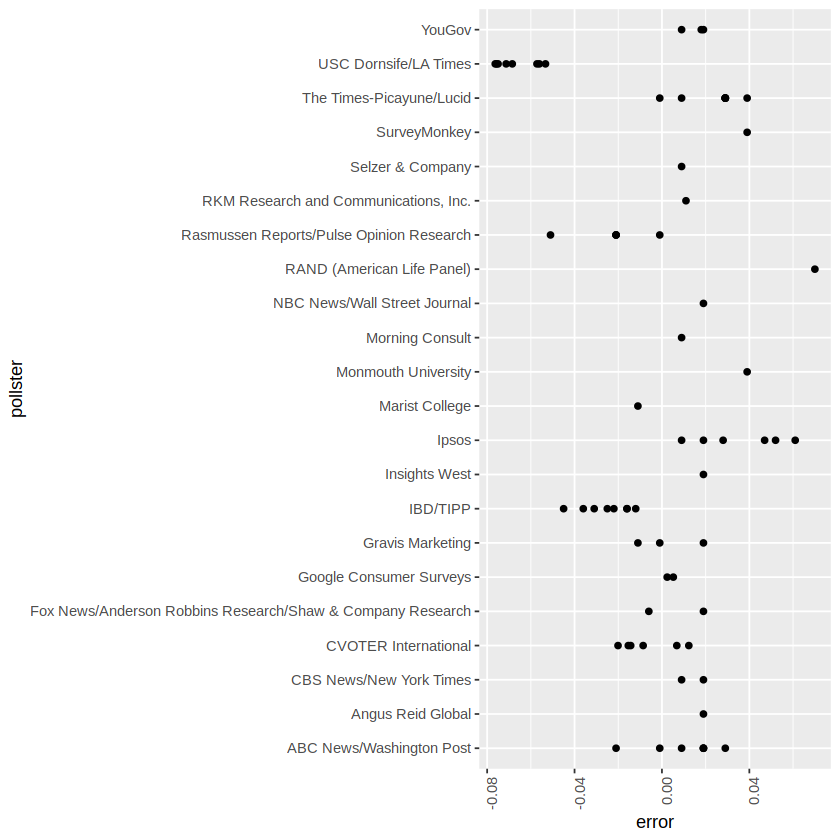

In [21]:
polls %>% ggplot(aes(x = error, y = pollster)) +
  geom_point() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))



#### Exercise 9: Comparring to actual results by pollster - multiple polls


Remake the plot you made for the previous exercise, but only for pollsters that took five or more polls.

You can use *dplyr* tools *group_by* and *n* to group data by a variable of interest and then count the number of observations in the groups. The function *filter* filters data piped into it by your specific condition.

For example:
data %>% group_by( <variable_for_grouping> ) %>% filter( n() >= 5 )

**Instructions**

* Define a new variable *errors* that contains the difference between the estimated difference between the proportion of voters and the actual difference on election day, *0.021*.
* Group the data by pollster using *group_by* function.
* Filter the data by pollsters with 5 or more polls.
* Use **ggplot* to create the plot of errors by pollster.
* Add a layer with the function *geom.point*.

In [37]:
polls <- polls_us_election_2016 %>% filter( enddate >= "2016-10-31" & state == "U.S." )

polls <- polls %>%
            mutate(d_hat = (polls$rawpoll_clinton / 100) - (polls$rawpoll_trump / 100) )
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400


In [38]:
d <- 0.021

polls <- polls %>%
            mutate( error = (d_hat - d) )
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat,error
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400,0.0190
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234,0.0024
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300,0.0090
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400,0.0190
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400,0.0190
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400,0.0190


In [46]:
err_pollster <- polls %>% group_by( error ) %>% filter(n() >= 5)

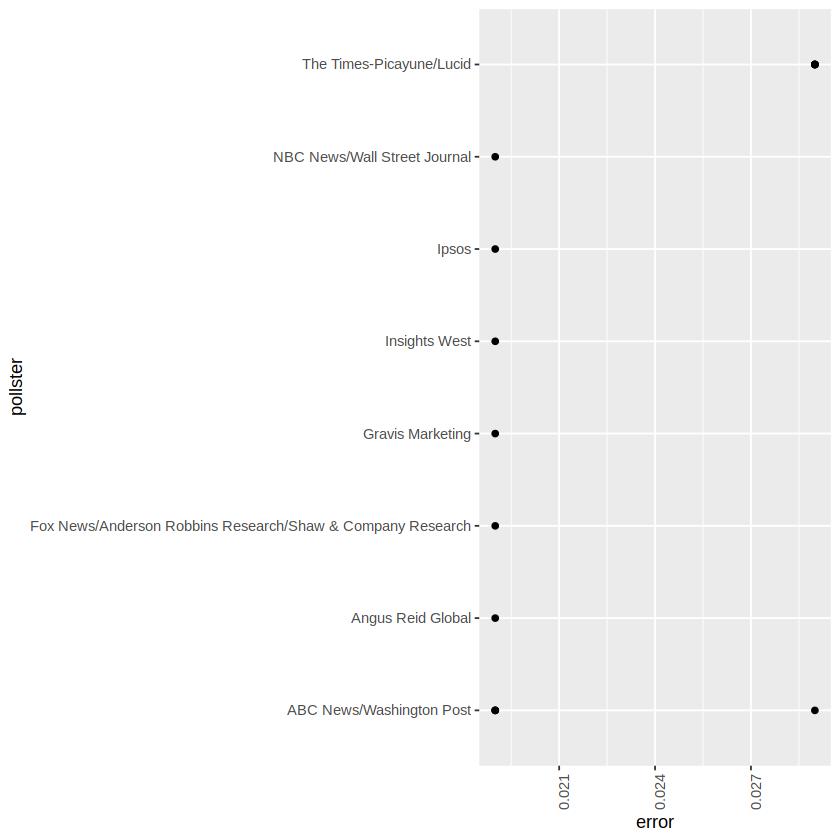

In [47]:
err_pollster %>% ggplot(aes(x = error, y = pollster)) +
  geom_point() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [43]:
polls2 <- polls %>% group_by( error ) %>% mutate( count=n() )
polls2

state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat,error,count
<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400,0.0190,9
U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234,0.0024,1
U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300,0.0090,3
U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400,0.0190,2
U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400,0.0190,9
U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400,0.0190,9
U.S.,2016-11-02,2016-11-06,CBS News/New York Times,A-,1426,lv,45.00,41.00,5.00,NA,45.11649,40.92722,4.341786,NA,0.0400,0.0190,2
U.S.,2016-11-03,2016-11-05,NBC News/Wall Street Journal,A-,1282,lv,44.00,40.00,6.00,NA,43.58576,40.77325,5.365788,NA,0.0400,0.0190,9
U.S.,2016-11-04,2016-11-07,IBD/TIPP,A-,1107,lv,41.20,42.70,7.10,NA,42.92745,42.23545,6.316175,NA,-0.0150,-0.0360,1


The next code is the same that *polls %>% group_by( error ) %>% filter(n() >= 5)*

In [44]:
polls2 %>% filter( count >= 5 )

state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat,error,count
<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47,43,4,NA,45.20163,41.72430,4.626221,NA,0.04,0.019,9
U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47,43,3,NA,46.84089,42.33184,3.726098,NA,0.04,0.019,9
U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48,44,3,NA,49.02208,43.95631,3.057876,NA,0.04,0.019,9
U.S.,2016-11-03,2016-11-05,NBC News/Wall Street Journal,A-,1282,lv,44,40,6,NA,43.58576,40.77325,5.365788,NA,0.04,0.019,9
U.S.,2016-11-01,2016-11-04,Angus Reid Global,A-,1151,lv,48,44,6,NA,47.57171,43.68125,5.556625,NA,0.04,0.019,9
U.S.,2016-11-05,2016-11-07,The Times-Picayune/Lucid,NA,2521,lv,45,40,5,NA,45.13966,42.26495,3.679914,NA,0.05,0.029,6
U.S.,2016-11-04,2016-11-07,Insights West,NA,940,lv,49,45,4,NA,49.14547,45.12675,4.253578,NA,0.04,0.019,9
U.S.,2016-11-02,2016-11-05,ABC News/Washington Post,A+,1937,lv,47,43,4,NA,45.28374,41.76419,4.635295,NA,0.04,0.019,9
U.S.,2016-10-31,2016-11-04,Ipsos,A-,2244,lv,43,39,6,NA,43.12950,38.96855,6.757478,NA,0.04,0.019,9




<hr/>

## Section 4: Statistical Models


### Poll Aggregators

In the 2012 president election, Barack Obama won the electoral college and he won the popular vote by a margin of 3.9\%. Let's go back to the week before the election, before we knew this outcome.

**Nate Silver** was giving Obama a 90\% change of winning. Yet, none of the individual polls were nearly that sure. How is Mr. Silver so confident? We're going to use a Monte Carlo simulation to illustrate what Nate Silver saw and other pundits did not.

* We're going to generate results for 12 polls taken the week before the election. 
* We're going to mimic the sample sizes from actual polls.
* We're going to construct and report 95\% confidence intervals for each of these 12 polls.

We're going to generate the data using the actual outcome, 3.9\%, so *d*, the *difference*, *spread* is *0.039*. The sample sizes were selected to mimic regular polls.

We're also going to define *p* (proportion of Democrats), the *spread plus 1 divided by 2*. Then we're going to use the *sapply* function to construct the confidence intervals.

*sapply* function is used when we want to apply a function to each element of a list, vector, or data frame and obtain a **vector** instead a *list* as result.

In [8]:
my_packages <- c( "dslabs", "tidyverse", "ggplot2" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )
library( ggplot2 )

d <- 0.039 
Ns <- c( 1298, 533, 1342, 897, 774, 254, 812, 324, 1291, 1056, 2172, 516 )
p <- (d + 1) / 2

confidence_intervals <- sapply( Ns, function(N) {
    X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p,p) )
    X_hat <- mean( X )
    SE_hat <- sqrt( X_hat*(1-X_hat) / N )
    2*c(X_hat, X_hat - 2*SE_hat, X_hat + 2*SE_hat) - 1
})


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



* For each sample size for each poll, we're going to generate a *sample*.
* Then we're going to compute the proportion of people voting for Obama *X_hat* ($\hat{X}$).
* Construct and *standard error*, *SE_hat* ($\hat{SE}$).
* And, then return the estimate *X_hat* as well as the beginning and end of the confidence interval.

We're going to do this and then we're going to generate a **data frame** that has all the results. Here are the results of the 12 polls that we generated with the Monte Carlo simulation.

The *t()* function represents to **transpose a data matrix**.

In [9]:
polls <- data.frame( poll=1:ncol( confidence_intervals ),
            t( confidence_intervals ),
            sample_size=Ns
            )
names( polls ) <- c("poll", "estimate", "low", "high", "sample_size" )
polls

poll,estimate,low,high,sample_size
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.035439137,-0.020038730,0.09091700,1298
2,-0.005628518,-0.092256762,0.08099973,533
3,0.023845007,-0.030734578,0.07842459,1342
4,0.070234114,0.003620963,0.13684726,897
5,-0.012919897,-0.084802412,0.05896262,774
6,0.078740157,-0.046361375,0.20384169,254
7,0.000000000,-0.070186241,0.07018624,812
8,-0.049382716,-0.160358264,0.06159283,324
9,0.062742060,0.007188695,0.11829543,1291


In [17]:
#ggplot( polls, aes( poll, estimate )) + geom_point() + geom_errorbar( aes(ymin=low, ymax=high) )

<center><img src="images/sec04-01.png"/></center>

Not surprisingly, all 12 polls report confidence intervals that include the election nigth result, which is shown with the dashed line.

However, all 12 poll intervals include 0, which is shown with a solid black line. 

Now we're going to describe how pundits are missing an key insight. Poll aggregators, such as Nate Silve, realize that by combining the results of different polls. By doing this, effectively we're conducting a poll with a huge sample size. As a result, we can report a smaller 95\% confidence interval, and therefore a more precise prediction.

Although as aggregators we do not have access to the raw poll data, we can use mathematics to reconstruct what we would have obtained had we made on large poll with, in this case, *11,269 people*, participants.

Basically we construct an estimate of the spread with a weighted average in the following way.

In [18]:
sum( polls$sample_size )

[1] 11269

Once we have an estimate of *d*, we can construct an estimate for the proportion votin for Obama, which we can then us to estimate the standar error.

In [25]:
d_hat <- polls %>%
    summarize(avg = sum(estimate*sample_size) / sum(sample_size)) %>%
    .$avg

p_hat <- (1+d_hat) / 2
moe <- 2*1.96*sqrt( p_hat*(1-p_hat) / sum( polls$sample_size ) )
print(p_hat)
print(moe)
round( d_hat*100, 1 )
round( moe*100, 1 )

[1] 0.5152187
[1] 0.01845492


[1] 3

[1] 1.8

Thus, using the weighted average, we can predict that the spread will be **3.1\%** plus or minus **1.8\%**, which not only includes the actual result, but is quite far from including 0.

Once we combine the 12 polls, we become quite certain that Obabma will win the popular vote.

<center><img src="images/sec04-02.png" /></center>

In this figure, you can see, in red, the interval that was created using combined polls. Nate Silve and other aggregators us the same approach to predict the electoral college.

However, that this was just a simulation, the actual data science exercise of forecasting elections is much more complicated and it involves stadistical modeling.



### Pollsters and Multilevel Models

We're going to explain how pollsters fit multilevel models to public poll data and use this to forecast election results. How we already saw, in the 2008 and 2012 US presidential elections, Nate Silver used this approach to make an almost perfect prediction and silenced the pundits (expertos).

Since 2008 election, other organizations have started their own election forecasting groups that, like Nate Silver, aggregate polling data and use statistical models to make predictions.

In 2016, forecasters greatly understimated Trump's chances of winning the election. The *Princeton Election Consortium* gave Trump less than 1\% chance of winning the election, while the *Huffington Post* gave him a 2\% chance.

In contrast, *FiveThirtyEight* had Trump's  chances of winning at 29\%.

By understanding statistical models, and how these forecasters use them, we will start to understand how this happend. We will start by looking at the prediction for the popular vote. 

*FiveThirtyEight* predicted a 3.6\% advantage for Clinton. Their interval, their prediction interval, included the acutal result of 2.1\%, 48.2\% for Clinton compared to 46.1\% for Trump.

Next, we're going to look at actual public polling data from the 2016 US presidential election to show how models are motivated and built to produce these predictions.


### Poll Data and Pollster Bias

We use public polling data organized by *FiveThirtyEight* for the 2016 presidential election. The data is included as part of the *dslabs pacakage*. We load these data as:

In [13]:
my_packages <- c( "dslabs", "tidyverse", "ggplot2" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

library( tidyverse )
library( dslabs )
library( ggplot2 )


In [6]:
data( polls_us_election_2016 )
t( t(names( polls_us_election_2016 ) ) )

state
startdate
enddate
pollster
grade
samplesize
population
rawpoll_clinton
rawpoll_trump
rawpoll_johnson
rawpoll_mcmullin


The table includes results for national polls, as well as state polls, taken in the year before the election.

We will filter the data to include national polls that happened during the week before the election. We also remove polls that *FiveThirtyEight* has determined not be reliable, and they have graded them with a *B* or less. Some polls have not been graded, and we're going to leave these in. The code to filter as we just described is:


In [8]:
polls <- polls_us_election_2016 %>%
            filter( state=="U.S." & 
                    enddate >= "2016-10-31" & 
                    ( grade %in% c("A+","A","A-","B+" ) | is.na(grade) ) )
head( polls )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.0,43.0,4.0,NA,45.20163,41.72430,4.626221,NA
2,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.0,39.0,6.0,NA,42.02638,38.81620,6.844734,NA
3,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.0,44.0,3.0,NA,49.02208,43.95631,3.057876,NA
4,U.S.,2016-11-02,2016-11-06,CBS News/New York Times,A-,1426,lv,45.0,41.0,5.0,NA,45.11649,40.92722,4.341786,NA
5,U.S.,2016-11-03,2016-11-05,NBC News/Wall Street Journal,A-,1282,lv,44.0,40.0,6.0,NA,43.58576,40.77325,5.365788,NA
6,U.S.,2016-11-04,2016-11-07,IBD/TIPP,A-,1107,lv,41.2,42.7,7.1,NA,42.92745,42.23545,6.316175,NA


We also add a *spread estimate*; the *spread* is what we're really interested in estimating. So, we type this code to get the *spread* in proportions.

In [9]:
polls <- polls %>%
            mutate( spread=rawpoll_clinton/100 - rawpoll_trump/100 )
head( polls, 3 )

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,spread
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47,43,4,NA,45.20163,41.72430,4.626221,NA,0.04
2,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42,39,6,NA,42.02638,38.81620,6.844734,NA,0.03
3,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48,44,3,NA,49.02208,43.95631,3.057876,NA,0.04


For our purpose, we will assume that there are only two parties, and call *p* the proportion voting for Clinton, and *1-p* the proportion voting for Trump.

We're interested in the spread, which we've shown is *2p-1*. Let's call this spread as *d*. We have several estimates of this spread from the different polls; the theory tells us that these estimates are a *random variables* with *probability distribution*, that is approximately **normal**. 

The *expected value is* the election night *spread*, *d*. And the *standard error* is $2\sqrt{p\ast(1-p)/N}$. Assuming tnat the urn model we described earlier are usful models, we can use this information to construct a confidence interval based on the *aggregated data*. The *estimated spread* is now computed like this because now the sample size is the *sum of all the sample sizes*.

In [11]:
d_hat <- polls %>% 
            summarize( d_hat=sum(spread * samplesize) / sum(samplesize) ) %>%
            .$d_hat
print( d_hat )                  # spread

[1] 0.01426264


And if we use this, we get a *standard error*, typing this code, that then leads us to a *margin of error (moe)* of $0.0066$.

In [12]:
p_hat <- (d_hat + 1) / 2
moe <- 1.96 * 2 * sqrt( p_hat*(1-p_hat)/sum(polls$samplesize) )
moe

[1] 0.006623178

So, if we were going to use this data, we would report a *spread* of *1.43\%* with a *margin of error* of *0.66\%*.

On election night, we find out that the actual percentage is *2.1\%*, which is outsider of the *95\%* confidential interval. So, what happened?. A histogram of the reported spreads shows another problem.

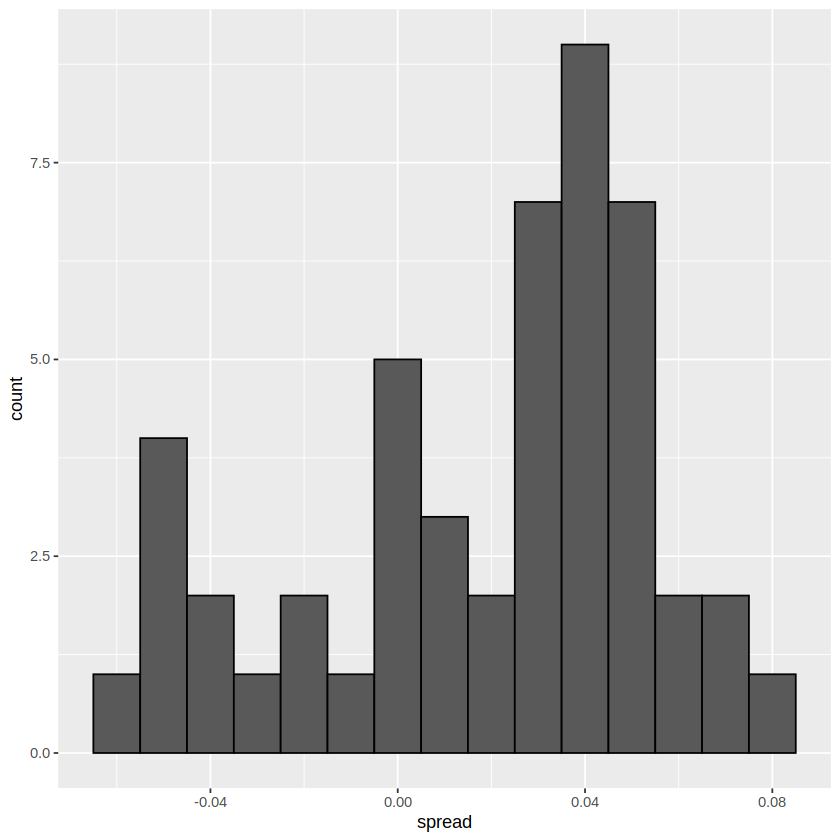

In [16]:
polls %>% ggplot( aes( spread) ) + geom_histogram( color="black", binwidth=.01 )

The data does not appear to be normally distributed, and the standard error appears to be larger than *0.0066*. The theory is not quite working here.

To see why, notice that various pollsters are involved, and some are taking several polls a week. Here's a table showing you how many polls each pollster took that las week.

In [18]:
polls %>% group_by( pollster ) %>% summarize( n() )

pollster,n()
<fct>,<int>
ABC News/Washington Post,7
Angus Reid Global,1
CBS News/New York Times,2
Fox News/Anderson Robbins Research/Shaw & Company Research,2
IBD/TIPP,8
Insights West,1
Ipsos,6
Marist College,1
Monmouth University,1


Let's visualize the data for the pollsters that are regularly polling. We write this piece of code that first filters for only pollsters that polled more than 6 times.

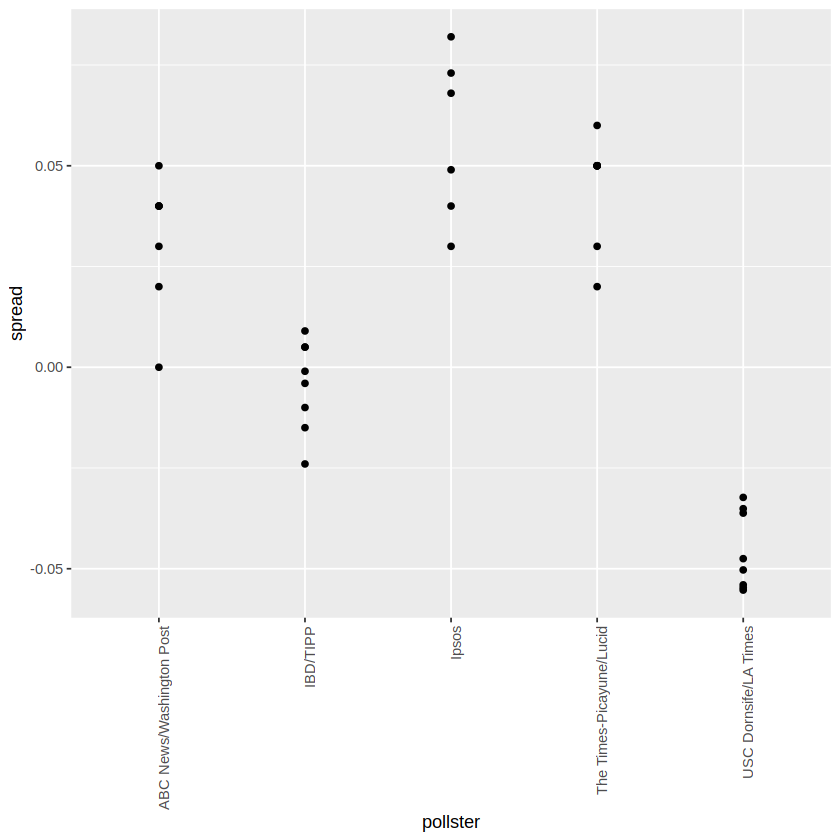

In [19]:
polls %>% group_by( pollster ) %>%
    filter( n() >= 6 ) %>%
    ggplot( aes( pollster, spread ) ) + geom_point() + 
    theme( axis.text.x=element_text( angle=90, hjust=1 ) )

This plot reveals an unexpected result. The *standard error*, predicted by theory for each poll. All the polls should have the same expected value, the actual spread, the spread we will see on election night.

FiveThirtyEight refers to these differences as *house effects*, we can also call them **pollster bias**.